# TMA4215: Numerical Mathematics - Autumn 2023 
## Project 2: Bézier curves

#### Candidates nr.: 10051, 10103 and 10010

### Introduction

In this project, we consider one further possibility to perform interpolation with piecewise polynomials, namely using a specific family of parametrized curves, that is the Bézier curve. Named after the french engineer Bézier, who used it to design cars for Renault, Bézier curves have become irreplaceable for creating fonts and animation. In this project however, we will focus on the mathematical side of the Bézier curves.

Let $ \textbf{p}_0, \dots, \textbf{p}_n \in \mathbb{R}^d$, $n \in \mathbb{N}$ (usually $d = 2$ or $d = 3$) denote $n + 1$ ordered points. 

Then the $n$-th degree Bézier curve is defined by

$$
\begin{align*}
\textbf{c}(t) &= \textbf{b}_n(t; \textbf{p}_0, \dots, \textbf{p}_n) = \sum_{i=0}^{n} B_{i,n}(t)\textbf{p}_i,
\end{align*}
$$

where $B_{i,n}(t)$ are the $n$-th degree Bernstein polynomials defined by

$$
\begin{align*}
B_{i,n}(t) := \binom{n}{i} t^i (1 - t)^{n-i}, \; i = 0, \dots, n,
\end{align*}
$$

where $\binom{n}{i}=\frac{n!}{i!(n-i)!}$ denotes the bionomial coefficient.

We use the first notation, $c(t)$, when the points are clear from context, andt the second, $\textbf{b}(t; \textbf{p}_0,\ldots, \textbf{p}_n)$ to emphasize the dependency of the nodes and/or the degree $n$.

In [1]:
#libraries used for the project
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Properties of Bernstein polynomials

Let $b\in \mathbb{N}$ be given. We consider the Bernstein polynomials $B_{i,n}(t)=0,\ldots ,n$.

**a)** In this task, we want to show that $B_{i,n}(t) \geq 0$ for all $t \in [0,1]$.

If all factors in $B_{i,n}(t)$ are $\geq 0$, then $B_{i,n}(t)$. Recall $n \in \mathbb{N}$ and $i=0,\ldots,n$.

Throughout this project we have to define $0^0$ multiple times. Since it is not trivial that $0^0=1$, we will show that this claim is correct. Below, on can find the proof that $0^0=1$. Let $x \in \mathbb{C}$ be scalar, then

$$
\begin{align*}
    \lim_{x \rightarrow 0_+} x^x &= \lim_{x \rightarrow 0_+} \left( e^{ln(x)} \right)^x =  \lim_{x \rightarrow 0_+} e^{xln(x)}
    = e^{\lim_{x \rightarrow 0_+} xln(x)} = e^{\lim_{x \rightarrow 0_+} \frac{ln(x)}{\frac{1}{x}}} = e^{\lim_{x \rightarrow 0_+} \frac{\frac{d}{dx}ln(x)}{\frac{d}{dx}\frac{1}{x}}} = e^{\lim_{x \rightarrow 0_+} \frac{\frac{1}{x}}{-\frac{1}{x^2}}} \\ 
    &= e^{\lim_{x \rightarrow 0_+} -x} = e^{0} = 1.
\end{align*}
$$

This shows that $0^0=1 \square$.

Now we are ready to find the factors for $B_{i,n}(t)$. Given $B_{i,n}(t)$, that is,

$$
\begin{align*}
    B_{i,n}(t) := \binom{n}{i} t^i (1 - t)^{n-i} &= \frac{n!}{i!(n-i)!} t^i (1 - t)^{n-i},
\end{align*}
$$

recall that $n \in \mathbb{N}$ and $i = 0, ..., n$, and consider the following terms that are part of Bernstein polynomials.

$$
\begin{align*}
n! &\geq 0! = 1 \\
i! &\geq 0! = 1 \\
(n-i)! &\geq 0! = 1. \\
\end{align*}
$$

Now that we know that $\binom{n}{i} \geq 0$, we can show that $t^i\geq 0$. For $i > 0$, we get

$$
\begin{align*}
    t^i & \geq 0^i = 0, \\
\end{align*}
$$

and when $i=0$, this yields that

$$
\begin{align*}
    t^i & \geq 0^0 = 1.\\
\end{align*}
$$

This leaves us with term $(1 - t)^{n-i}$. Since $t \in [0,1]$ or in other words, $0 \leq t \leq 1$, we can see that the greatest value $(1 - t)^{n-i}$ can have is $1$ when $t=0$, and the lowest value is $0$ when $t=1$. This means that $(1 - t)^{n-i} \geq 0$. Since all terms in $B_{i,n}(t)$ are greater or equal nil, this means that $B_{i,n}(t)\geq 0$ for any $t\in [0,1]$.

**b)** We want to show that the Bernstein polynomials for $0<i<n$ can be recursively defined by

$$
\begin{align*}
B_{i,n}=(1-t)B_{i,n-1}(t)+tB_{i-1,n-1}(t), t \in [0,1].
\end{align*}
$$

We begin calculating using the result on the right hand side for $0<i<n$:

$$
\begin{align*}
(1-t)B_{i,n-1}(t)+tB_{i-1,n-1}(t) &= (1-t) \frac{(n-1)!}{i!(n-1-i)!} t^i (1-t)^{n-1-i} + t \frac{(n-1)!}{(i-1)!(n-i)!}t^{i-1}(1-t)^{n-i} \\
&= \left[ \frac{1}{i} + \frac{1}{n-i} \right]  \frac{(n-1)!}{(i-1)!(n-1-i)!} t^i (1 - t)^{n-i} \\
&= \left[ \frac{i+n-i}{i(n-i)} \right]  \frac{(n-1)!}{(i-1)!(n-1-i)!} t^i (1 - t)^{n-i} \\
&= \frac{(n)!}{(i)!(n-i)!} t^i (1 - t)^{n-i} \\
&= B_{i,n}(t).
\end{align*}
$$

As we can see, it is possible to wirte the Bernstein polynomials in their recursive form. However, this statement is only true for $0<i<n$. The reason for that is when $i=0$ then, $(i-1)!=(-1)!$, and when $i=n$, $(n-1-i)!=(-1)!$, where both results are undefined. Therefore, we cannot use the recursive formula for $i=0$ and $i=n$. Thus, we will have calculate $B_{0,n}(t)$ and $B_{n,n}(t)$ directly. This gives us

$$
\begin{align*}
B_{0,n} &= \binom{n}{0} t^0 (1 - t)^{n-0} = (1-t)^n, \\
\text{and} \\
B_{n,n} &= \binom{n}{n} t^n (1 - t)^{n-n} = t^n.
\end{align*}
$$

**c)** We want to show that the $B_{i,n}(t)$ form a partition of unity, which means that

$$
\begin{align*}
\sum_{i=0}^n B_{i,n}(t)=1, \text{ for } t\in[0,1].
\end{align*}
$$

We will prove this by inducing over $n$.
First we find for $n=0$.

$$
\begin{align*}
\sum_{i=0}^0 B_{i,0}(t)= B_{0,0}(t) = \binom{0}{0}t^0(1-t)^{0}=1
\end{align*}
$$

We can see that the statement is true for $n=0$, which is the first step of our proof by induction. We further assume that $
\sum_{i=0}^n B_{i,n}(t)=1$ is true for $n\in \mathbb{N}$. Using this assumption we want to show that the statement is true for $n+1$ assuming that it is true for $n$.

$$
\begin{align*}
\sum_{i=0}^{n+1} B_{i,n+1}(t) &= B_{0,n+1} + B_{n+1,n+1} + \sum_{i=1}^{n} B_{i,n+1}(t), \\
\end{align*}
$$

using the results from b), we can see that

$$
\begin{align*}
\sum_{i=0}^{n+1} B_{i,n+1}(t)
&= (1-t)^{n+1} + t^{n+1} +  \sum_{i=1}^{n} (1-t)B_{i,n}(t)+tB_{i-1}{n}(t) \\
&= (1-t)^{n+1} + t^{n+1} + (1-t)\sum_{i=1}^{n} B_{i,n}(t) + t\sum_{i=0}^{n-1}B_{i,n}(t),
\end{align*}
$$

and using the assumtpion that the statement is true for $n$,

$$
\begin{align*}
\sum_{i=0}^{n+1} B_{i,n+1}(t) &= (1-t)^{n+1} + t^{n+1} + (1-t)(1-B_{0,n}) + t(1-B_{n,n}) \\
&= (1-t)^{n+1} + t^{n+1} + (1-t)(1-(1-t)^n) + t (1-t^n) \\
&= (1-t)^{n+1} + t^{n+1} + 1 -t-(1-t)(1-t)^n + t - t^{n+1} \\
&= 1 + (1-t)^{n+1} + -(1-t)^{n+1} \\ 
&= 1.
\end{align*}
$$

With the asumption that $\sum_{i=0}^n B_{i,n}(t)=1$ we have proven that $\sum_{i=0}^{n+1} B_{i,n+1}(t)=1$ is also true. Combining that with $\sum_{i=0}^0 B_{i,0}(t) = 1$, and using induction, we can conclude that 

$$
\begin{align*}
\sum_{i=0}^n B_{i,n}(t)=1, \text{ for } t\in[0,1], \; n \in \mathbb{N} \; \square.
\end{align*}
$$

**d)** We want to show that the derivative is given by

$$
\begin{align*}
B_{i,n}'(t) = n \left( B_{i-1,n-1}(t)-B_{i,n-1}(t)\right), \\
\end{align*}
$$

with $B_{-1,n-1}\equiv B_{n,n-1} \equiv 0$.

The solution for some of the derivatives we will use are:

$$
\begin{align*}
\frac{d}{dt}\left( t^i \right) &=
\begin{cases}
it^{i-1} & \text{if } i > 0 \\
0 & \text{if } i = 0
\end{cases}. \\
\frac{d}{dt}\left( (1-t)^{n-i} \right) &=
\begin{cases}
(n-i)(1-t)^{n-1-i} & \text{if } i \neq n \\
0 & \text{if } i = n
\end{cases}.
\end{align*}
$$

With these results in mind, we can find $B_{i,n}'(t)$ for $0<i<n$.

$$
\begin{align*}
B_{i,n}'(t) = \frac{d}{dt} \left[ B_{i,n}(t) \right] &= \frac{d}{dt} \left[ \frac{n!}{i!(n-i)!} t^i (1-t)^{n-i} \right] \\
&= \frac{n(n-1)!}{i!(n-i)!} \left[ i t^{i-1}(1-t)^{b-i} - (n-i)t^i(1-t)^{n-1-i} \right] \\
&= n \left[ \frac{i(n-1)!}{i!(n-i)!}t^{i-1}(1-t)^{n-i} - \frac{(n-i)(n-1)!}{i!(n-i)!} t^i(1-t)^{n-1-i} \right] \\
&= n \left[ \frac{(n-1)!}{(i-1)!((n-1)-(i-1))!}t^{i-1}(1-t)^{(n-1)-(i-1)} - \frac{(n-1)!}{i!((n-1)-i)!} t^i(1-t)^{(n-1)-i} \right] \\
&= n \left[ B_{i-1,n-1}(t)-B_{i,n-1}(t)\right],
\end{align*}
$$

as we can see, the statement is true for $n\in \mathbb{N}\backslash \{0\}$ and $0<i<n$.

Now we want to find the derivative when $i=n\neq0$. This gives us

$$
\begin{align*}
B_{n,n}'(t)=\frac{d}{dt}\left[ B_{n,n}(t) \right] &= \frac{d}{dt}\left[ \binom{n}{n}t^n(1-t)^{n-n} \right] \\
&= n \left[ \binom{n}{n}t^{n-1} \right] \\
&= n \left[ \binom{n}{n}t^{n-1} (t-1)^{(n-1)-(n-1)} - 0 \right] \\
&= n \left[ B_{n-1,n-1}(t) - B_{n,n-1}(t) \right], \\
\end{align*}
$$

which shows that the statement is true for $i=n\neq0$.

Furthermore, the statement holds as well for $i=0\neq n$, as we can see below:

$$
\begin{align*}
B_{0,n}'(t)=\frac{d}{dt}\left[ B_{0,n}(t) \right] &= \frac{d}{dt}\left[ \binom{n}{0}t^0(1-t)^{n-0} \right] \\
&= n \left[- \binom{n}{0}(1-t)^{n-1} \right] \\
&= n \left[0 - \binom{n}{0}t^0(1-t)^{(n-1)-0} \right] \\
&= n \left[ B_{-1,n-1}(t) - B_{0,n-1}(t) \right], \\
\end{align*}
$$

meaning that the statement is true for $i=0\neq n$.

Lastly, we will have to show what happens when $i=n=0$:

$$
\begin{align*}
B_{0,0}'(t)=\frac{d}{dt}\left[ B_{0,0}(t) \right] &= \frac{d}{dt}\left[ \binom{0}{0}t^0(1-t)^{0-0} \right] = \frac{d}{dt}\left[ 1 \right] = 0 = 0 + 0 = 0 \left[ 0 + 0 \right] = 0 \left[ B_{0-1,0-1}(t)-B_{0,0-1}(t) \right].
\end{align*}
$$

The statement is true for $i=n=0$.

Since the statement holds for all cases above, we have proven that the derivative is given by $B_{i,n}'(t) = n \left( B_{i-1,n-1}(t)-B_{i,n-1}(t)\right), B_{-1,n-1}\equiv B_{n,n-1} \equiv 0$, $\forall n\in \mathbb{N}$.

**e)** We will now define a function `Bernstein(i,n,t)` that evaluates $B_{i,n}$ at $t$. Then we will plot the results for $B_{i,n}(t),i=0,\ldots ,n$ for $n=4,5,15$.

In [2]:
'''''
The code below is the implementation of the Bernstein polynomial. It takes in:
    - i: a scalar index
    - n: order of the polynomial
    - t: an array with the value for t, 0 ≤ t ≤ 1
Returns: 
    - The Bernstein polynomial for a given index i
'''''

def Bernstein(i, n, t):
    return np.math.factorial(n)/(np.math.factorial(i)*np.math.factorial(n-i))*t**i*(1-t)**(n-i)

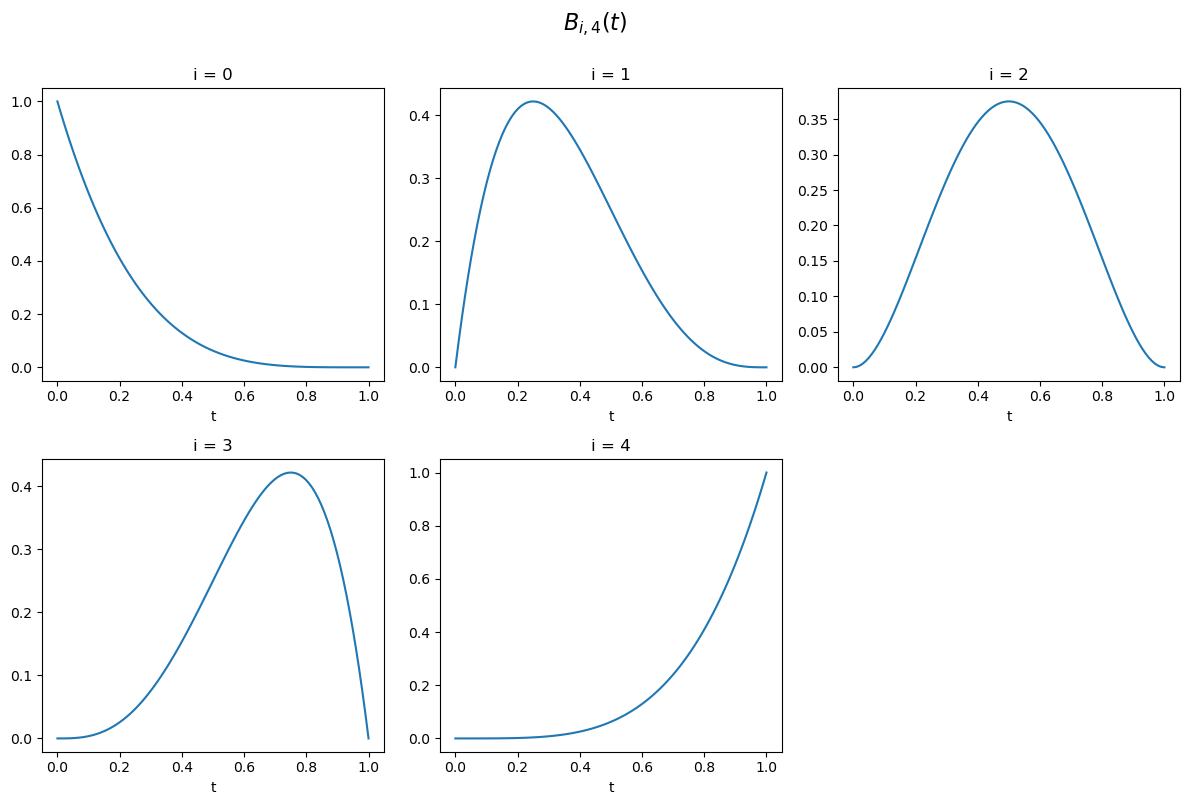

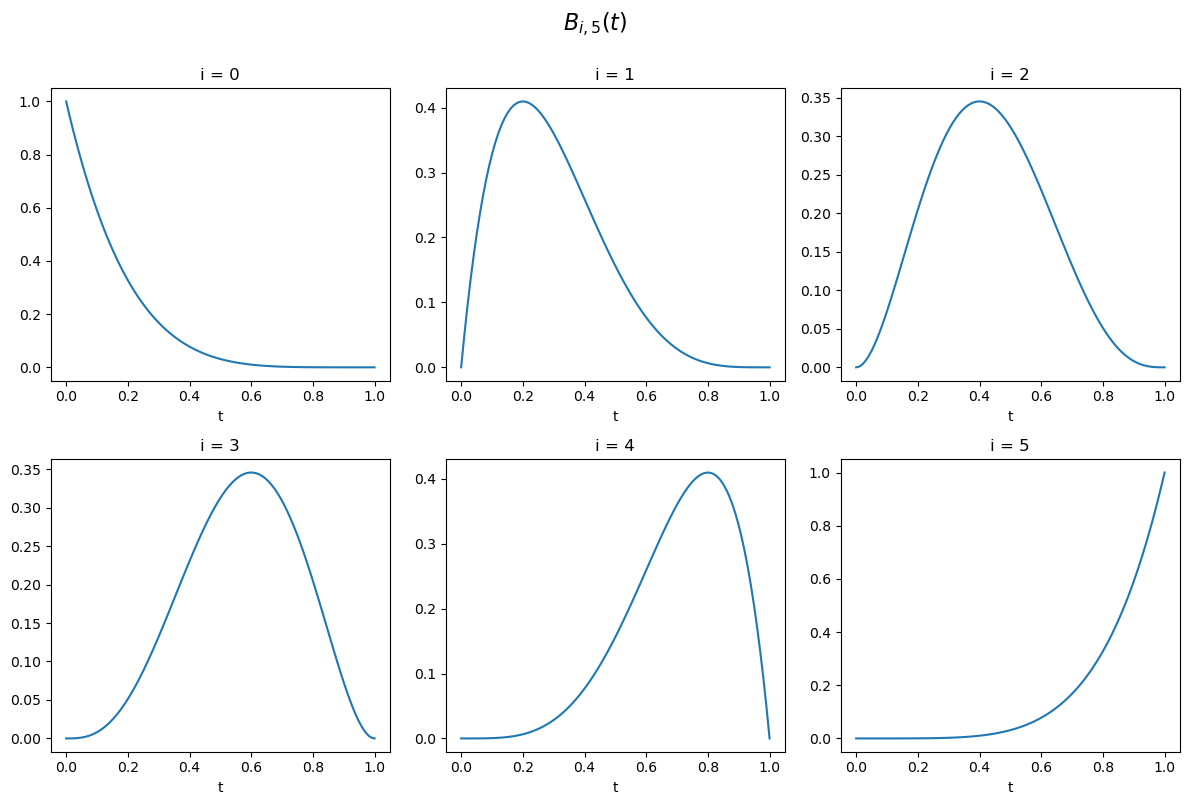

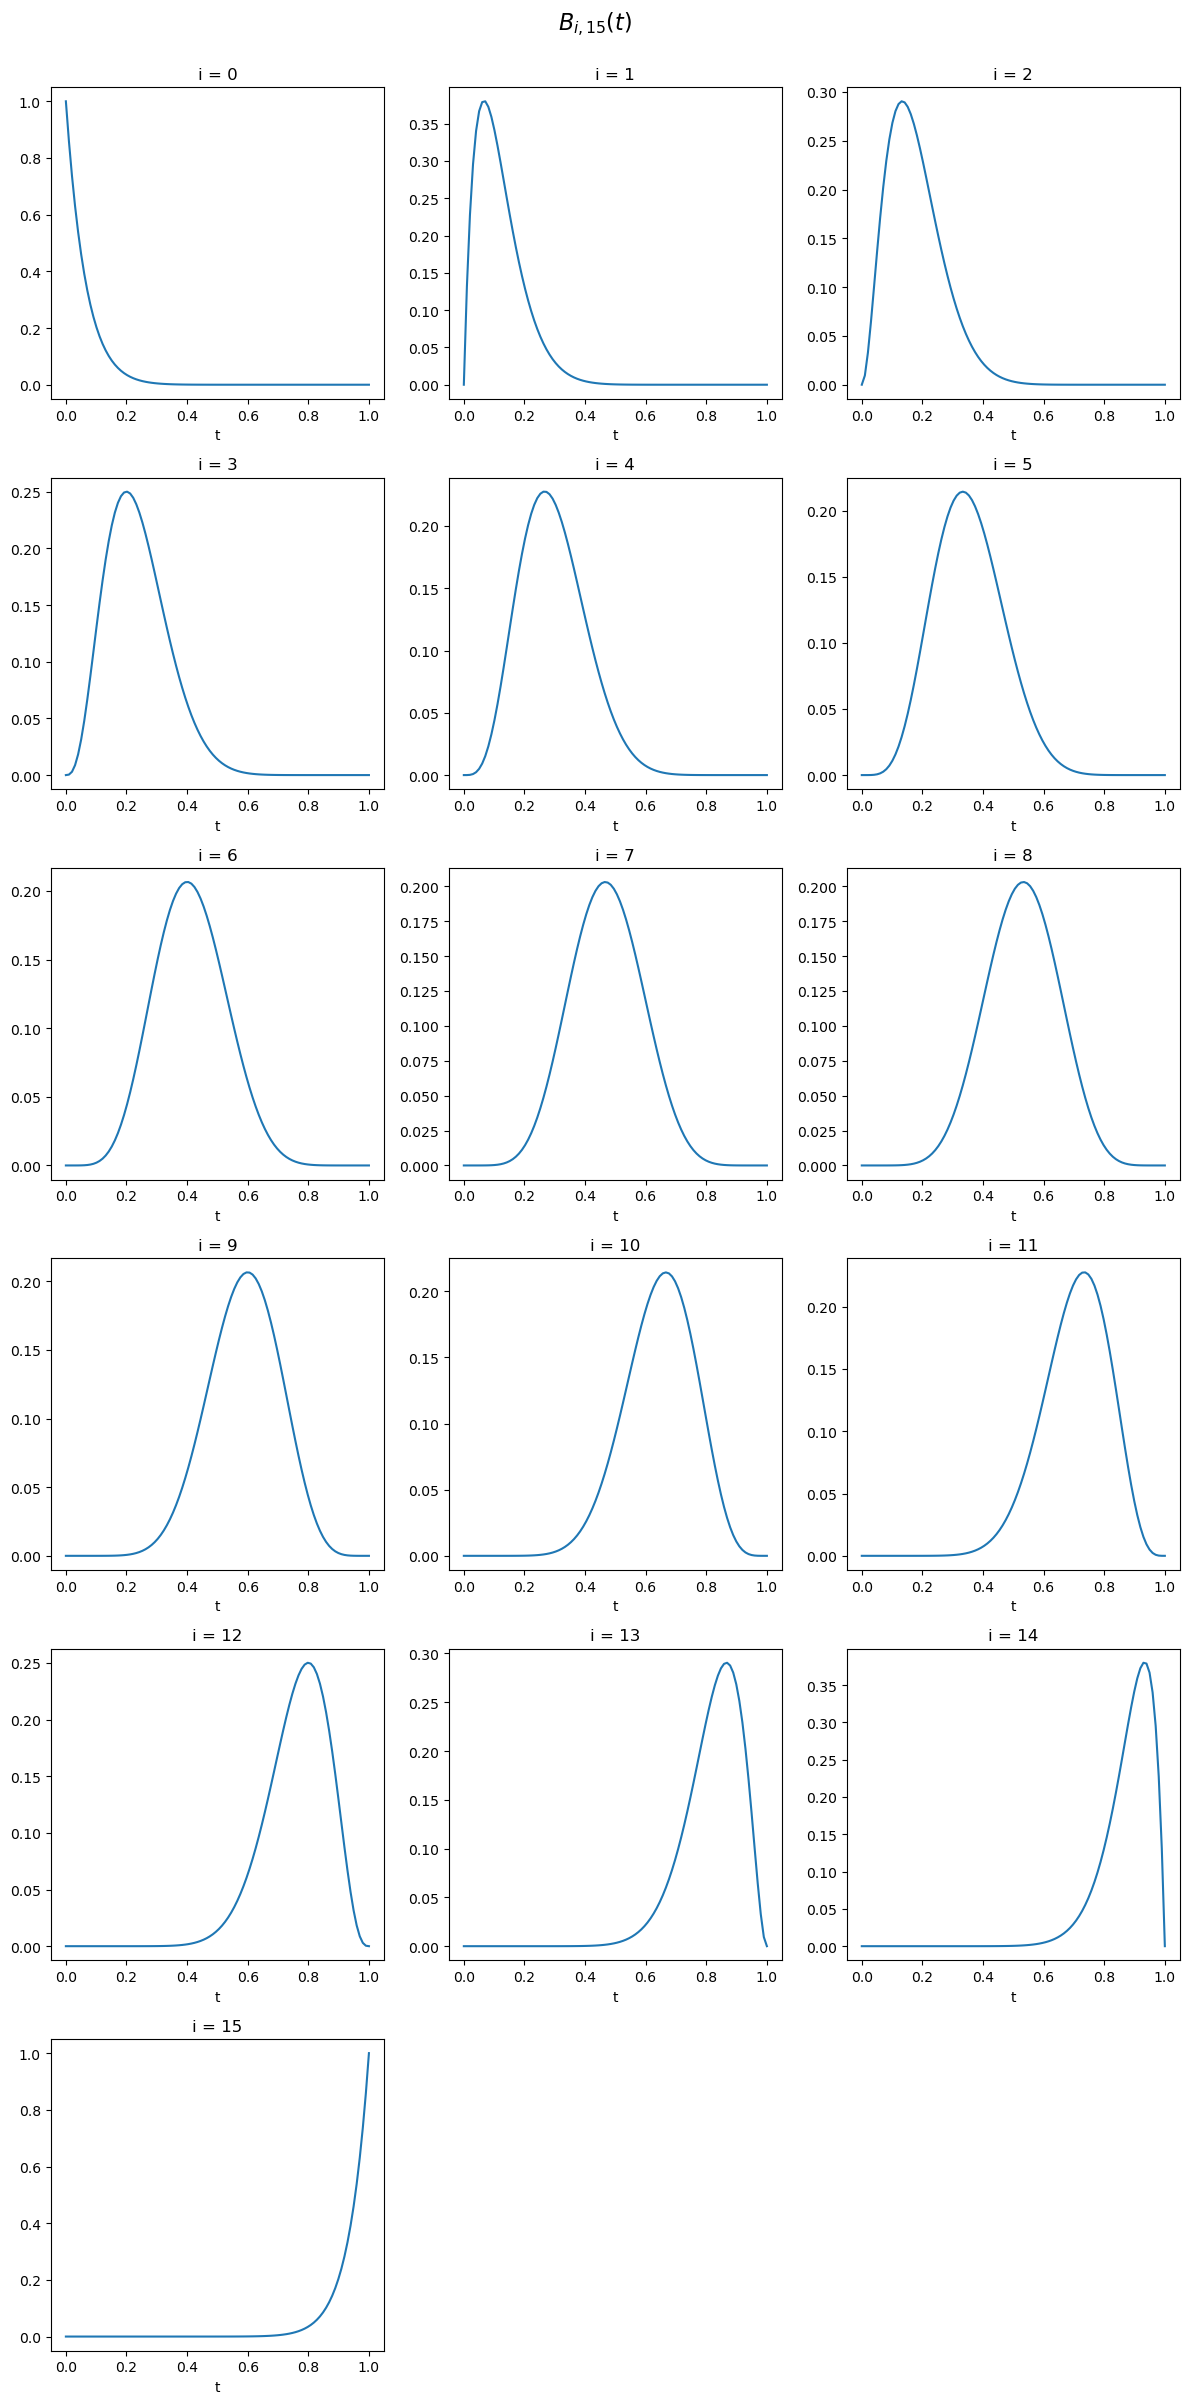

In [3]:
n_list = [4,5,15]
t = np.linspace(0,1,100)

for n in n_list:
    i_values = np.arange(n+1)
    
    #determine the number of rows required based on len(i_values) and 3 columns
    num_rows = int(np.ceil(len(i_values) / 3.0))
    
    #plotting for the current n
    plt.figure(figsize=(12, 4 * num_rows))
    
    for index, i_value in enumerate(i_values):
        plt.subplot(num_rows, 3, index+1)
        plt.plot(t, Bernstein(i_value, n, t))
        plt.title(f'i = {i_value}')
        plt.xlabel("t")
    
    plt.suptitle(f'${{B_{{{"i"},{n}}}(t)}}$', fontsize=16, y=1)
    plt.tight_layout()
    plt.show()

The figure above shows us the plots for $B_{i,n}(t), \text{ for } i=0, \ldots, n$ given that $n=4,5,15$.

### Task 2: Properties of (composite) Bézier curves

In this task, we consider the points $\textbf{p}_0, \ldots,\textbf{p}_n \in \mathbb{R}^d$ and $\textbf{q}_0, \ldots,\textbf{q}_n \in \mathbb{R}^d$ and their corresponding Bézier curves $\textbf{c}(t)=\textbf{b}(t;\textbf{p}_0,\ldots,\textbf{p}_n)$ and $\textbf{d}(t)=\textbf{b}(t;\textbf{q}_0,\ldots,\textbf{q}_n)$, respectively.

In this problem, we will want to consider composite Bézier curves, or piecewise Bézier curves, e.g a curve $\textbf{s}:[0,2]\rightarrow \mathbb{R}^d$ defined by

$$
\begin{align*}
\textbf{s}(t)=
\begin{cases}
\textbf{c}(t) &\text{for }0\leq t <1 \\
\textbf{d}(t-1) &\text{for }1\leq t\leq2.
\end{cases}
\end{align*}
$$

A better understanding of the (composite) Bézier curves will turn out to be crucial for the upcoming tasks. Without further a do, let us solve some problems.

**a)** In this exercise, we want to compute the first two derivatives of $\textbf{c}$, that is $\textbf{c}'(t)$ and $\textbf{c}''(t)$ of $\textbf{c}(t)$. Recall that $\textbf{c}(t)$ is given as

$$
\begin{aligned}
& \textbf{c}(t)=\textbf{b}\left(t ; \textbf{p}_{0}, \ldots, \textbf{p}_{n}\right)=\sum_{i=0}^{n} B_{i, n}(t) \textbf{p}_{i}.
\end{aligned}
$$

We calculate $\textbf{c}'(t)$:

$$
\begin{aligned}
    \textbf{c}^{\prime}(t) & = \frac{\text{d}}{\text{d} t}\left( \sum_{i=0}^{n}  B_{i, n}(t) \textbf{p}_{i} \right) \\
    &= \sum_{i=0}^{n} \frac{\text{d}}{\text{d} t}\left( B_{i, n}(t) \right)\textbf{p}_{i} \\
    \text{Using the results from (1d)} &\\
    &=\sum_{i=0}^{n} n\left(B_{i-1, n-1}(t)-B_{i, n-1}(t)\right) \textbf{p}_{i} \\
    &=n \sum_{i=0}^{n} B_{i-1, n-1}(t) \textbf{p}_{i}-n \sum_{i=0}^{n} B_{i, n-1}(t) \textbf{p}_{i} \\
    \text{Recalling that $B_{-1, n-1}=B_{n, n-1}=0$:} & \\
    & = n \sum_{i=0}^{n-1} B_{i, n-1}(t) \textbf{p}_{i+1}-n \sum_{i=0}^{n-1} B_{i, n-1}(t) \textbf{p}_{i} \\
    & =n \sum_{i=0}^{n-1} B_{i, n-1}(t)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right).
\end{aligned}
$$

Lastly, we calculate $c''(t)$:

$$
\begin{aligned}
    \textbf{c}^{\prime \prime}(t) & = \frac{\text{d}}{\text{d}t} \left( n \sum_{i=0}^{n-1} B_{i, n-1}(t)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \right) \\
    & = (n-1) \sum_{i=0}^{n-1} \frac{\text{d}}{\text{d} t}\left(B_{i, n-1}(t)\right)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
    \text{Using the results from (1d)} &\\
    & =n(n-1) \sum_{i=0}^{n-1}\left(B_{i-1, n-2}(t)-B_{i, n-2}(t)\right)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
    & =  n(n-1) \sum_{i=0}^{n-1} B_{i-1, n-2}(t)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right)-n(n-1) \sum_{i=0}^{n-1} B_{i, n-2}(t)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
        \text{Recalling that $B_{-1, n-1}=B_{n, n-1}=0$} & \\
    & =n(n-1) \sum_{i=0}^{n-2} B_{i, n-2}(t)\left(\textbf{p}_{i+2}-\textbf{p}_{i+1}\right)-n(n-1) \sum_{i=0}^{n-2} B_{i,n-2}(t)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
    & =n(n-1) \sum_{i=0}^{n-2} B_{i, n-2}(t)\left(\textbf{p}_{i+2}-2 \textbf{p}_{i+1}+\textbf{p}_{i}\right)
\end{aligned}
$$

**b)** We want to find the values that $\textbf{c}(t)$ attend at its end points, i.e. at $t=0$ and $t=1$. We start by finding $\textbf{c}(0)$:

$$
\begin{aligned}
    \textbf{c}(0) &= \sum_{i=0}^{n} B_{i, n}(0) \, \textbf{p}_{i} \\
    &=\sum_{i=0}^{n} \frac{n !}{i !(n-i) !} 0^{i} \cdot 1^{n-i} \textbf{p}_{i} \\
\end{aligned}
$$

As we can see, for any $i \neq 0$, the equation above is equalt to $0$. However, if we recall that $0^0 = 1$, the equation above has a non-zero result, only when $i=0$, meaning that


$$
\begin{aligned}
    \textbf{c}(0) &=\frac{n !}{n !} \textbf{p}_{0} \\
    &=\textbf{p}_{0}. \\ \\
\end{aligned}
$$

Now that we have found $\textbf{c}(0)$, we can find $\textbf{c}(1)$.

$$
\begin{aligned}
    \textbf{c}(1) & = \sum_{i=0}^{n} B_{i, n}(1) \, \textbf{p}_{i} \\
    &= \sum_{i=0}^{n} \frac{n !}{i !(n-i) !} 1^{i} \cdot 0^{n-i} \, \textbf{p}_{i} \\
\end{aligned}
$$

Similarly to $\textbf{c}(0)$, we can see that the equation above has a non-zero result if and only if $i=n$ such that $0^{n-n} = 0^0 = 1$. This means that

$$
\begin{aligned}
    \textbf{c}(1)&=\frac{n !}{n !} \textbf{p}_{n} \\
    &=\textbf{p}_{n}.
\end{aligned}
$$

These results imply that the Bézier curve begins at $\textbf{p}_0$, and ends at $\textbf{p}_n$. In other words it connects the first and the last point with the help of a continuous curve.

**c)** In this task, we want to prove that the following properties hold:

$$
\begin{align*}
& \textbf{1)} \; \textbf{c}'(0) =n \, (\textbf{p}_1 - \textbf{p}_0) \\
& \textbf{2)} \; \textbf{c}'(1) = n \, (\textbf{p}_n - \textbf{p}_{n-1}) \\
& \textbf{3)} \; \textbf{c}''(0) = n \, (n-1)(\textbf{p}_0 - 2\textbf{p}_1 + \textbf{p}_2)\\
& \textbf{4)} \; \textbf{c}''(1) = n \,(n-1)(\textbf{p}_n - 2\textbf{p}_{n-1} + \textbf{p}_{n-2})
\end{align*}
$$

**1)**

$$
\begin{aligned}
\textbf{c}^{\prime}(0) & = n \sum_{i=0}^{n-1} B_{i, n-1}(0)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
& = n \sum_{i=0}^{n-1} \frac{(n-1) !}{i !(n-1-i) !} \cdot 0^{i} \cdot 1^{n-1-i}\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
\end{aligned}
$$

As we can see, the sum is non-zero only if $i=0$, which results in 

$$
\begin{aligned}
\textbf{c}^{\prime}(0) &=n\frac{(n-1)!}{(n-1)!}\left(\textbf{p}_{1}-\textbf{p}_{0}\right)\\
&=n\left(\textbf{p}_{1}-\textbf{p}_{0}\right) \square
\end{aligned}
$$

**2)** Now that we have proven **1)**, we can prove **2)**:

$$
\begin{aligned}
\textbf{c}^{\prime}(1)&=n \sum_{i=0}^{n-1} B_{i, n-1}(1)\left(\textbf{p}_{i+1}-\textbf{p}_{i}\right) \\
& = n \sum_{i=0}^{n-1} \frac{(n-1) !}{i !(n-1-i) !} \cdot 1^{i} \cdot 0^{n-1-i} \left(\textbf{p}_{i+1}-\textbf{p}_{i}\right),
\end{aligned}
$$

which clearly is non-zero when $i=n-1$, so that

$$
\begin{aligned}
\textbf{c}^{\prime}(1) & =n\frac{(n-1)!}{(n-1)!}\left(\textbf{p}_{n}-\textbf{p}_{n-1}\right) \\
& =n\left(\textbf{p}_{n}-\textbf{p}_{n-1}\right)  \square
\end{aligned}
$$

**3)** Now moving on to **3)**, we want to show that $\textbf{c}''(0) = n(n-1)\left(\textbf{p}_{0}-2 \textbf{p}_{1}+\textbf{p}_{2}\right)$.

$$
\begin{aligned}
\textbf{c}''(0) &= n(n-1) \sum_{i=0}^{n-2} B_{i, n-2}(0)\left(\textbf{p}_{i+2} -2\textbf{p}_{i+1} + \textbf{p}_{i}\right) \\
& = n(n-1) \sum_{i=0}^{n-2} \frac{(n-2) !}{i !(n-2-i) !} \cdot 0^{i} \cdot 1^{n-2-i} \left(\textbf{p}_{i+2} - 2\textbf{p}_{i+1} + \textbf{p}_{i}\right), 
\end{aligned}
$$

which is non-zero if and only if $i=0$. This means that

$$
\begin{aligned}
\textbf{c}''(0) & =n(n-1)\frac{(n-2)!}{(n-2)!} \left(\textbf{p}_{2} -2\textbf{p}_{1} + \textbf{p}_{0}\right) \\
& =n(n-1)\left(\textbf{p}_{2} -2\textbf{p}_{1} + \textbf{p}_{0}\right) \square
\end{aligned}
$$
**4)** At last, we will prove that $\textbf{c}''(1) = n(n-1)(\textbf{p}_n - 2\textbf{p}_{n-1} + \textbf{p}_{n-2})$.

$$
\begin{aligned}
    \textbf{c}''(1) &= n(n-1) \sum_{i=0}^{n-2} B_{i, n-2}(1)\left(\textbf{p}_{i+2} - 2\textbf{p}_{i+1} + \textbf{p}_{i}\right) \\
    & = n(n-1) \sum_{i=0}^{n-2} \frac{(n-2) !}{i !(n-2-i) !} \cdot 1^{i} \cdot 0^{n-2-i} \left(\textbf{p}_{i+2} - 2
    \textbf{p}_{i+1} + \textbf{p}_{i}\right), 
\end{aligned}
$$

which is non-zero only when $i=n-2$

$$
\begin{aligned}
    \textbf{c}''(1) & =n(n-1)\frac{(n-2)!}{(n-2)!}\left(\textbf{p}_{n-2} - 2\textbf{p}_{n-1} + \textbf{p}_{n}\right) \\
    & =n(n-1)\left(\textbf{p}_{n-2} - 2\textbf{p}_{n-1} + \textbf{p}_{n}\right) \square
\end{aligned}
$$

Adjusting $p_1$ modifies both the direction and magnitude of the initial velocity of the curve at $t=0$. Similarly, altering $p_{n-1}$ changes the direction and magnitude of the velocity at $t=1$.

$p_2$ does not influence the initial velocity at $t=0$, but it does have an effect on the initial acceleration. Likewise, $p_{n-2}$ does not impact the end velocity at $t=1$, but it does affect the end acceleration.

Although these control points do not directly determine the interpolated positions on the curve, they significantly influence the trajectory that the curve takes between its start and end points. In essence, by controlling the curve's velocities and accelerations at the endpoints, these points shape the path that bridges the interpolated points.

**d)** Using the recursion property of Bernstein polynomial, we want to prove the recursive definition

$$
\begin{align*}
\textbf{b}_n(t;\textbf{p}_0,\ldots ,\textbf{p}_n) = (1-t)\textbf{b}_{n-1}(t;\textbf{p}_0, \ldots, \textbf{p}_{n-1}) + t \textbf{b}_{n-1}(t;\textbf{p}_1,\ldots ,\textbf{p}_n).
\end{align*}
$$

Recall that

$$
\begin{align*}
\textbf{b}_n(t;\textbf{p}_0, \ldots, \textbf{p}_n) &= \sum_{i=0}^{n} B_{i,n}(t)\textbf{p}_n \\
&= B_{0,n}(t)\textbf{p}_0 + B_{n,n}(t)\textbf{p}_n + \sum_{i=1}^{n-1} B_{i,n}(t)\textbf{p}_n. \\
\end{align*}
$$

Using the properties we have found in **1b)** about $\textbf{b}_n$, we get

$$
\begin{align*}
\textbf{b}_n &= B_{0,n}(t)\textbf{p}_0 + B_{n,n}(t)\textbf{p}_n + \sum_{i=1}^{n-1} \left[ (1-t)B_{i,n-1}(t) + t B_{i-1,n-1}(t) \right]\textbf{p}_n \\
&= (1-t)^n\textbf{p}_0 + t^n\textbf{p}_n + (1-t) \sum_{i=1}^{n-1} B_{i,n-1}(t)\textbf{p}_i + t \sum_{i=1}^{n-1} B_{i-1,n-1}(t) \textbf{p}_i \\
&= (1-t)(1-t)^{n-1}\textbf{p}_0 + t\cdot t^{n-1}\textbf{p}_n + (1-t) \sum_{i=1}^{n-1} B_{i,n-1}(t)\textbf{p}_i + t \sum_{i=1}^{n-1} B_{i-1,n-1}(t) \textbf{p}_i \\
&= (1-t)B_{0,n-1}(t)\textbf{p}_0 + tB_{n-1,n-1}(t)\textbf{p}_n + (1-t) \sum_{i=1}^{n-1} B_{i,n-1}(t)\textbf{p}_i + t \sum_{i=1}^{n-1} B_{i-1,n-1}(t) \textbf{p}_i \\
&= (1-t)\sum_{i=0}^{n-1} B_{i,n-1}(t)\textbf{p}_i + t \sum_{i=1}^{n} B_{i-1,n-1}(t) \textbf{p}_i \\
&= (1-t)\textbf{b}_{n-1}(t;\textbf{p}_0, \ldots, \textbf{p}_{n-1}) + t \textbf{b}_{n-1}(t;\textbf{p}_1, \ldots, \textbf{p}_n),
\end{align*}
$$

which proves the recursive defintion $\textbf{b}_n(t;\textbf{p}_0,\ldots ,\textbf{p}_n) = (1-t)\textbf{b}_{n-1}(t;\textbf{p}_0, \ldots, \textbf{p}_{n-1}) + t \textbf{b}_{n-1}(t;\textbf{p}_1,\ldots ,\textbf{p}_n) \square.$

**e)** The recursive definition above can actually be used to define the de Casteljau algorithm to evalute $\textbf{b}_n(t_0; \textbf{p}_0), ..., \textbf{p}_n)$ at $t_0 \in [0,1]$. In the code below, that is the `de_Casteljau(P, t)` function, we first start with $\textbf{p}_{0,i}(t_0) = \textbf{p}_i$ to compute the intermediate points

$$
\textbf{p}_{k,i}(t_0) = (1-t_0) \textbf{p}_{k-1,i}(t_0) + t_0\textbf{p}_{k-1,i+1}(t_0)
$$

for $k=1, ..., n$ and $i=0, ..., n-k$. Thereafter, we compute $\textbf{b}_n(t_0; \textbf{p}_0, ..., \textbf{p}_n) = \textbf{p}_{n,0}$, and hence, evaluate the corresponding Bézier curve at $t$. 


In [4]:
'''''
The function below is the implementation of the de Casteljau algorithm which is quintessential for the evaluation
of the Bézier curve. The function de_Casteljau takes in: 
    - P: a vector that contains points, and is of length n+1
    - t: an array for the x-axis
    
Returns: 
    - p0: values for the Bézier curve for a given t
    - Pvecs: a matrix that contains a vector of points for every level k considered
'''''

def de_Casteljau(P, t):
    n = len(P)
    p = np.array(P, dtype=float).copy()
    P_vecs = [p.copy()]
    
    for k in range(1, n):
        k_level = []
        for i in range(n-k):
            #using the given formula above:
            p[i] = (1-t)*p[i] + t*p[i+1]
            k_level.append(p[i].copy())
        
        P_vecs.append(np.array(k_level))
    Pvecs = np.array(P_vecs, dtype=object)
    
    return p[0], Pvecs

Now let us plot the corresponding curve for the points 

$$
\begin{equation*}
  \textbf{p}_0 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, 
  \qquad \textbf{p}_1 = \begin{pmatrix} -1 \\ 5 \end{pmatrix},
  \qquad \textbf{p}_2 = \begin{pmatrix} 4 \\ 4 \end{pmatrix},
  \qquad \textbf{p}_3 = \begin{pmatrix} 9 \\ 3 \end{pmatrix},
  \qquad \textbf{p}_4 = \begin{pmatrix} 8 \\ 8 \end{pmatrix},
\end{equation*}
$$ 

where we also will include one line per "level" $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$. The block of code below does just that. 

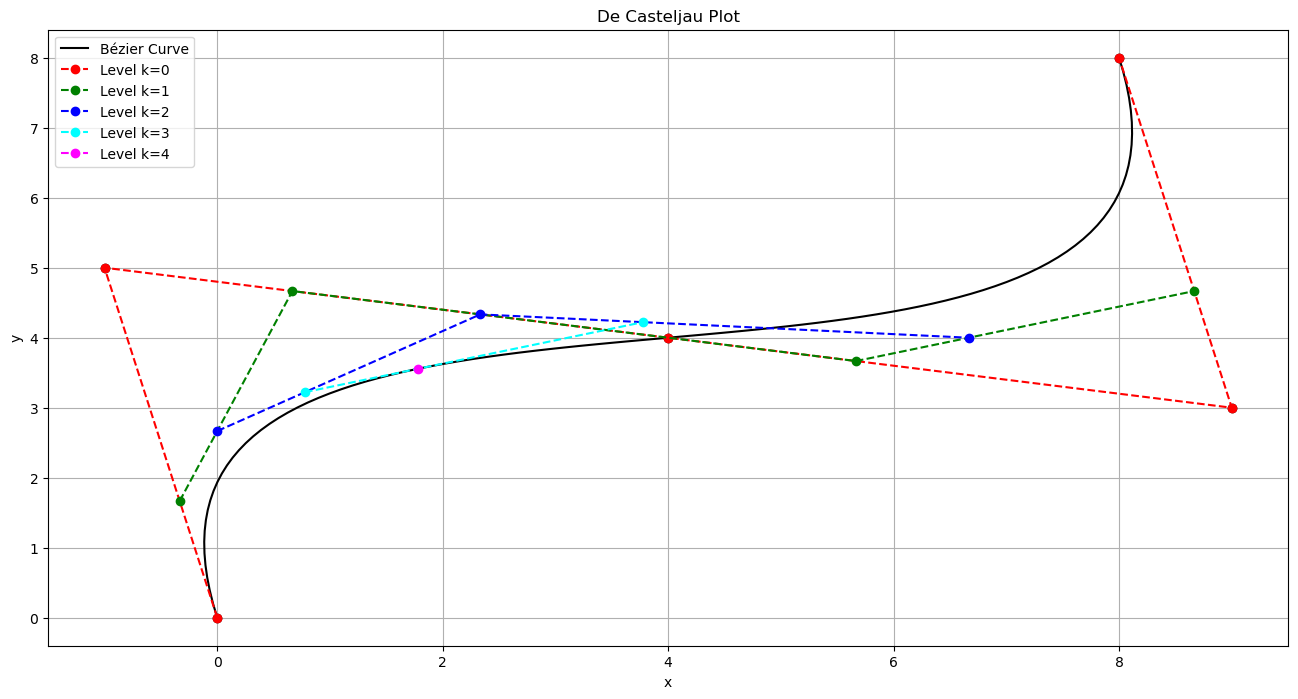

In [5]:
P = [[0, 0], [-1, 5], [4, 4], [9, 3], [8, 8]] #a matrix with the given points

t_vals = np.linspace(0, 1, 100) #t in [0,1]
x_vals = []
y_vals = []

for t in t_vals:
    x_vals.append(de_Casteljau(P, t)[0][0])
    y_vals.append(de_Casteljau(P, t)[0][1])

#plotting 
plt.figure(figsize=[16,8])    

#plotting the given points p0 through p4
for i in P:
    plt.plot(i[0], i[1], "o", color='black')

#plotting the Bézier curve
plt.plot(x_vals, y_vals, label="Bézier Curve",color ="black")

k_points = de_Casteljau(P, 1/3)[1]

#plotting the control points used to plot the Bézier curve
colors = ['red', 'green', 'blue', 'cyan', 'magenta']
for idx, points in enumerate(k_points):
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    plt.plot(x_coords, y_coords,'--o',color=colors[idx], label=f"Level k={idx}")


plt.legend()
plt.title("De Casteljau Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Above we see the Bézier curve in black together with one line per "level" $k$ connecting the points when evaluating the curve at $t_0 = \frac{1}{3}$.

**f)** Considering a composite Bézier curve $\textbf{s}(t)$, and assuming that we want $\textbf{s}(t)$ ot be a $C^k, k=0,1,2$ continuous function, then, increasing the class $k$ increases the dependent properties we have to impose.  

**1)** The interesting points to investigate on for the property to be a $C^{k}$-continuous function are the join points. All the points in between the join points satisfy the conditions for $C^{\infty}$-continuity because the points come from the same function. At the join points, the points can come from two different functions so we have to investigate the derivatives in these points.

**2)** For the function to be $C^{0}$-continuous, the join points have to be connected. Recall therefore $\textbf{s}(t)$. From its defintion, it is easy to say that 

$$
\textbf{s}(t) =\textbf{c}(t)=\textbf{d}(t-1),
$$ 

for $t=1$.

This means that
$$
\textbf{c}(1) = \textbf{d}(0) \implies \textbf{p}_{n} = \textbf{q}_{0}.
$$

Thus, the last point in $\textbf{c}(t)$, that is $\textbf{p}_n$, needs to be the same as the first point in $\textbf{d}(t-1)$, which is $\textbf{q}_0$, for the function $\textbf{s}(t)$ to be $C^{0}$-continuous.

**3)** For the function to be $C^{1}$-continuous, it has to be $C^{0}$ continuous at first. As mentioned in the previous item, this means that
$$
\textbf{p}_{n} = \textbf{q}_{0}.
$$

Furthermore, the velocity has to be continuous at the join points, meaning that

$$
\textbf{c}^{\prime}(1) = \textbf{d}^{\prime}(0).
$$

Given the properties of $\textbf{s}(t)$ that we have found in previous items, that is,

$$
\textbf{c}^{\prime}(1) = n(\textbf{p}_{n} - \textbf{p}_{n-1})\\
\textbf{d}^{\prime}(0) = n(\textbf{q}_{1} - \textbf{q}_{0}),
$$

$C^1$-continuity will therefore imply that

$$
n(\textbf{p}_{n} - \textbf{p}_{n-1})=n(\textbf{q}_{1} - \textbf{q}_{0}) \Leftrightarrow \textbf{p}_{n} - \textbf{p}_{n-1} = \textbf{q}_{1} - \textbf{q}_{0},
$$

which then results in

$$
\textbf{q}_{1} = 2\textbf{p}_{n} - \textbf{p}_{n-1}.
$$

In terms of geometry, this means that the neighbouring points to the join point are mirrored through the join point.

**4)** For the function to be $C^{2}$-continuous it has to be both $C^{1}$ and $C^{0}$-continuous, as well as having a continuous acceleration at the join point. The acceleration of $\textbf{s}(t)$ at $t=1$ is given as

$$
\textbf{c}^{\prime \prime}(1) = \textbf{d}^{\prime \prime}(0).
$$

Given the properties from an earlier exercise, that is,

$$
n(n-1)\left(\textbf{p}_{n} - 2 \textbf{p}_{n-1} + \textbf{p}_{n-2}\right) = n(n-1)\left(\textbf{q}_{0} - 2\textbf{q}_{1} + \textbf{q}_{2}\right),
$$

and applying the properties of $C^{1}$- and $C^{0}$-continuity, we get

$$
\textbf{p}_{n} - 2\textbf{p}_{n-1} + \textbf{p}_{n-2} = \textbf{p}_{n} - 4\textbf{p}_{n} + 2\textbf{p}_{n-1} + \textbf{q}_{2}\\
4(\textbf{p}_{n} - \textbf{p}_{n-1}) + \textbf{p}_{n-2} = \textbf{q}_{2}.
$$

**5)** From the properties of $C^{0}$-continuous functions, we know that the restrictions for the freedom degrees are

$$
\begin{equation*}
\textbf{p}_{0} = \textbf{d}_{0}, \qquad \textbf{p}_{3} = \textbf{q}_{0} = \textbf{d}_{1}, \qquad \textbf{q}_{3} = \textbf{d}_{2}.
\end{equation*}
$$

From $C^{1}$-continuity, we know that $\textbf{p}_{2}$ and $\textbf{q}_{1}$ are restricted by one another, but we can choose one of them freely. The points which are no longer restricted are $\textbf{p}_{1}, \textbf{q}_{2}$ and $\textbf{p}_{2}$ or $\textbf{q}_{1}$. At this point, we have in total 3 degrees of freedom. 

Let us now consider the properties for $C^2$-continuous functions. Recall that 

$$
\textbf{q}_{2} = 4(\textbf{p}_{3} - \textbf{p}_{2}) + \textbf{p}_{1}.
$$

This makes the previously free points $\textbf{p}_{1}, \textbf{p}_{2}$ and $\textbf{q}_{2}$ connected with one another, as they all are part of the equation above, meaning that we are left with 2 degrees of freedom. 

**6)** If we want $\textbf{s}(t)$ to be periodic with $\textbf{s}(t) = \textbf{s}(t+2)$ we need $\textbf{d}_{0}$ and $\textbf{d}_{2}$ to be the same point. This means that $s(0)=s(2)\implies d_0 = d_2$. For $C^{1}$-continuity, the four points we have left needs to be mirrored two by two. $p_2$ and $q_1$ are mirrored by $d_1$. $q_2$ and $p_1$ are mirrored by $d_0$. We only have two degrees of freedom in this case.


### Task 3: Interpolation with (composite, cubic) Bézier curves

Continuing our research about Bézier curves, we have reached the point where we now will study the interpolation of (composite, cubic) Bézier curves.  The most prominent variants of the composite cubic Bézier curves are - similar to $B$ splines - again those Bézier curves that yield cubic polynomials, i.e. $\textbf{b}_3(t;\textbf{p}_0, \textbf{p}_1, \textbf{p}_2, \textbf{p}_3)$. To obtain a spline, we consider composite Bézier curves, i.e. we "stitch together" several Bézier curves (as considered for the case of 2 curves in the last problem):

Given a number $m$ of segments and $4m$ points $\textbf{p}_{0, i}, \textbf{p}_{1, i}, \textbf{p}_{2,i}, \textbf{p}_{3, i}\in \mathbb{R}^d$ for $i=1,\ldots ,m$, we define

$$
\begin{align*}
B(t) = \Bigg\{ b_3(t-i+1;p_{0,i},p_{1,i},p_{2,i},p_{3,i}) \text{  for }i-1\leq t < i \text{ and each }i=1,\ldots ,m.
\end{align*}
$$

**a)** In this exercise, we want to implement the `composite_Bezier(P, t)` that evaluates $B(t)$ for $t\in [0,m]$, where $P=(\textbf{p}_{k,i})_{j=0,i=1}^{3,m}$ denotes a matrix of control points.

First, we redefine our `de_Casteljau(P, t_vals)`-function, such that it now can take arrays of $t$-values as an argument, and has the Bézier curve as the only return parameter.

In [6]:
'''''
The function below is almost the same as the previous implementation fo the de Casteljau algorithm but without 
the return value 'Pvec' and it takes t-arrays in stead of a single t value. It takes in,
    - P: a matrix that contains the control points
    - t: an array for the x-axis
    
Returns: 
    - p0: values for the Bézier curve for a given t
'''''

def de_Casteljau(P, t_vals):
    n = len(P)
    results = []
    
    for t in t_vals:
        p = np.array(P, dtype=float).copy()
        
        for k in range(1, n):
            k_level = []
            for i in range(n-k):
                #implementation of the theory from the previous task.
                p[i] = (1-t)*p[i] + t*p[i+1]
                k_level.append(p[i].copy())

        
        results.append(p[0])
        
    p0 = np.array(results)
    
    return p0

Now, we define the funciton `composite_Bezier(P, t)` that "stitches together" a series of Bézier curves.

In [7]:
'''''
The function composite_Bezier(P,t) stitches together a series of Bézier curves. It takes in:
    - P: a matrix with control points
    - t: an array with values for the x-axis
    
It returns:
    - a series of coherent Bézier curves.
'''''

def composite_Bezier(P,t):
    
    m = len(P)
    results = []
    len_t = len(t)
    
    for i in range(m):
        P_segment = P[i]
        
        #creating a Bézier curve using the new de_Casteljau function, and not considering duplicate points:
        result = de_Casteljau(P_segment, t[i*int(len(t)/m):(i+1)*int(len(t)/m)]-i)
        results.extend(result) #stitching together the Bézier curve
    
    return np.array(results)

Lets test our fuction using the points $P=(p_{k,i})_{j=0,i=1}^{3,m}$, who are defined in the code below.

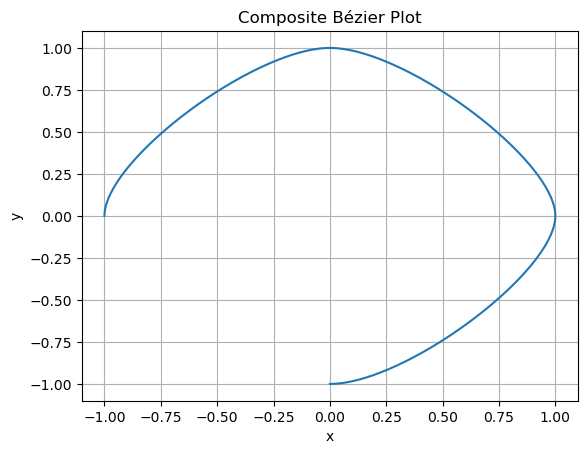

In [8]:
P = [[[-1, 0], [-1, 1/3], [-1/3, 1], [0, 1]],
     [[0, 1], [1/3, 1], [1, 1/3], [1, 0]],
     [[1, 0], [1, -1/3], [1/3, -1], [0, -1]]] #given control points put inside the P-matrix

t = np.linspace(0, 1 * len(P), 100 * len(P)) #x-axis

x_y = composite_Bezier(P,t) 
 
#plotting
plt.plot(x_y[:,0],x_y[:,1])
plt.title("Composite Bézier Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

The figure above is the plot for the given matrix of control points $P$. As we can see, the different segments of the Bézier curves have been stitched together, so that the result is a composite Bézier curve.

**b)** Now using the properties of composite Bézier curves that we have found so far, as well as the data points $\textbf{a}_0,...,\textbf{a}_{m-1} \in \mathbb{R}^d$ and the velocities $\textbf{v}_0,...,\textbf{v}_{m-1} \in \mathbb{R}^d$, lets find the periodic composite cubic Bézier curve $\textbf{B}(t)$ that maps from $[0,m]$ to $\mathbb{R}^d$. Furthermore, we want that $\textbf{B}(t)$ has the following properties:

$$
\begin{align*}
& \textbf{B}(0) = \textbf{B}(m) \\
& \textbf{B}'(0) = \textbf{B}'(m) \\
& \textbf{B}(i) = \textbf{a}_{i} \; \text{for} \; i = 0,...,m-1 \\
& \textbf{B}'(i) = \textbf{v}_{i} \; \text{for} \; i = 0,...,m-1
\end{align*}
$$

$\textbf{P}_k$ = $\left\{ \textbf{P}_k^{(i)} \right\}$ for $k = 0,1,2,3$ and $i = 0,1,...,m-1$ is a set of points that denote the control points given in the matrix that contains the control points.

Since our composite Bézier curve is $C^1$-continuous we can use the results from **Task 2f)**, and express our control points as

$$
\begin{align*}
& \textbf{P}_0^{(i)} = \textbf{a}_i \\
& \textbf{P}_1^{(i)} = \frac{\textbf{v}_{i}}{3} + \textbf{P}_0^{(i)} \\
& \textbf{P}_2^{(i)} =\textbf{P}_3^{(i)}  - \frac{\textbf{v}_{i+1}}{3} \\
& \textbf{P}_3^{(i)} = \textbf{a}_{i+1}.
\end{align*}
$$

Below, on can find the implement of the function `interpolate_periodic(A,V)`, which uses the findings above to convert the vector `A`, thats is the interpolation points $[\textbf{a}_0, ..., \textbf{a}_{m-1}]$, and the vector `V` which is the vector of the velocities $[\textbf{v}_0, ..., \textbf{v}_{m-1}]$, intro a matrix `P` with all of the control points. Those control points can then be used in the function `composite_Bezier(P,t)` to plot the result. 

In [9]:
'''''
The code below is the implementation of our findings above. The function interpolate_periodic(A,V) takes in:
    - A: a vector with all interpolation points
    - V: a vector with the velocities for each point in A
Returns: 
    - P: a matrix with all of the control points
'''''

def interpolate_periodic(A,V):
    P = []
    
    for i in range(len(A)-1):
        temp_p = [] #temporary p
        
        #using the information about the control points P_i (i=0,1,2,3) we found above
        p0 = A[i]
        p3 = A[i+1]
        p1 = (V[i]/3) + p0
        p2 = -(V[i+1]/3) + p3
        
        temp_p.extend([p0,p1,p2,p3])
        P.append(temp_p) #matrix P
    
    return P 

Looking at the result for the periodic composite cubic Bézier curve $\textbf{B}(t)$, we can analyse the smoothness of the curve. Recall the first two conditions for $\textbf{B}(t)$, that is, 

$$
\begin{align*}
& \textbf{B}(0) = \textbf{B}(m) \\
& \textbf{B}'(0) = \textbf{B}'(m).
\end{align*}
$$

Now, if we chech whether the last control of one segment is the first control point of the next segment, we can see that since $\textbf{B}(0) = \textbf{B}(m)$, this condition is met. This means that the curve is continuous at every single position in addition to being continous at the start and end points of the segments, meaning that it is $C^0$-continuous. 

Continuing our analysis, we can check whether $\textbf{B}(t)$ is $C^1$-continuous. For a curve to be $C^1$-continuous, we need $B'(t)$ to be continuous at the start and end points of the segments. Since $\textbf{B}'(0) = \textbf{B}'(m)$, we can say the velocity of the curve is continuous at the join points, meaning that the conditions for $C^1$-continuity are met. Thus, the curve is $C^1$-continuous. 

**c)** Now let us demonstrate how the function `interpolate_periodic(A,V)` works. We define first a function `plot(P, Title = "Composite Bézier Plot")`, which is a function that plots composite Bézier curves using `interpolate_periodic(A,V)`. The plotting function does not return anything as it only plots. 

In [10]:
'''''
The function plot(P, Title = "Composite Bézier Plot"), takes in:
    - P: a matrix with all control points
    - Title: the title of function, set to be "Composite Bézier Plot" by default
Returns: 
    - None
'''''

def plot(P, Title = "Composite Bézier Plot"):
    
    t = np.linspace(0, len(P), 100 * len(P))

    x_y = composite_Bezier(P,t)
    
    #plotting
    plt.figure(figsize=(5,5)) 
    plt.plot(x_y[:,0],x_y[:,1])
    plt.title(Title)
    plt.grid(True)
    plt.show()

In the code below, we plot the letter "**V**" using composite Bézier curves. For that, we have two arrays, one for points, that is `v_points`, and one for velocities, that is `v_velocity`. `v_points` contains a set of points in the cartesian coordinate system. The code for `interpolate_periodic(A,V)` then stitches together the Bézier curves. 

On the other hand, `v_velocity` is an array that contains the velocities for both x- and y-directions at a given point in `v_points`. Since we are plotting the letter "**V**", we will have sharp edges and tight turns in the letter, hence why we ave chosen to keep the velocities noticeably small, making the hard turns around our join points possible.

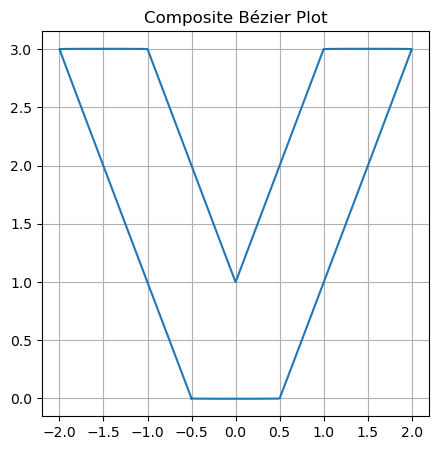

In [11]:
#control points
v_points = np.array([[-0.5,0],[0.5,0],[2,3],[1,3],[0,1],[-1,3],[-2,3],[-0.5,0]])

#using low velocities to create sharp angles and enable esier turns in the sharp edges
v_velocity = np.array([[1,-1],[1,1],[-1,1],[-1,-1],[-1,0],[-1,1],[-1,-1],[1,-1]])*0.01

points = interpolate_periodic(v_points,v_velocity)
plot(points) #using the plot-function to plot

The figure above represents our plot of the letter "**V**". At first the edges in the plot may seem sharp. However this is due to low velocities that were used when creating the figure, meaning that we still have $C^1$-continuity in the join points. 

Now, since the letter "**V**" has sharp angles with long, straight segments, we decided it would be evident to try something a bit more fancy. Thus, we have chosen to also plot the german letter "Eszett", also known commonly known as "scharfes S" and written as "**ß**". Here, we have to rely on both small and big velocities to ensure either straight lines or curvy segments. 

In the code below, one can find the points used for drawing the letter "**ß**", as well as the velocities at the different points. 

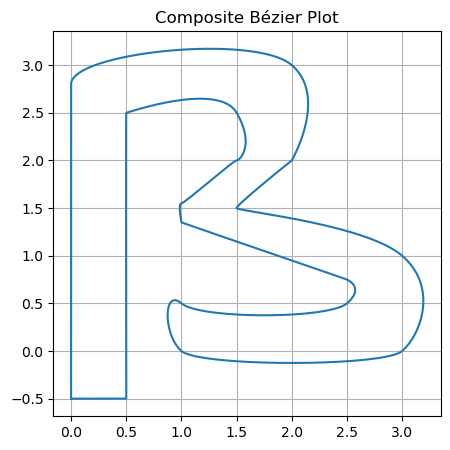

In [12]:
#control points
sz_points = np.array([[0,-0.5],[0,2.8],[2,3],[2,2],[1.5,1.5],[3,1],[3,0],[1,0],
                      [1,0.5],[2.5,0.5],[2.5,0.75],[1,1.35],[1,1.55],[1.5,2],[1.5,2.5],[0.5,2.5],[0.5,-0.5],[0,-0.5]])

#usign a variation of big and small velocities to ensure either curvy or straight segments
sz_velocities = np.array([[0,1],[0,100],[100,-100],[-0.01,-0.01],[1,-10],[100,-100],[-50,-50],[-50,50],
                          [50,-50],[50,50],[-1,1],[0,1],[10,1],[10,1],[-50,100],[-1,1],[0,1],[0,1]])*0.01

eszett_points = interpolate_periodic(sz_points,sz_velocities)
plot(eszett_points)

The figure above represents the plot of the "**ß**"-letter. We see that we have increased the speed, wich allows us to create more curved segments. However, we also have some "sharp" edges that require slower velocities. All in all, this was a much harder letter to create as we needed to balance curvy segments with straight lines.

**d)** We now want to take the resulting control points for our "**V**" from **Item c)** and transform them using different approaches:

1) `Q` where each $q_{i,j}=2p_{i,j}$

2) `R` where each $r_{i,j} =
\begin{pmatrix}
\text{cos} \frac{\pi}{8} & -\text{sin}\frac{\pi}{8} \\
\text{sin} \frac{\pi}{8} & \text{cos}\frac{\pi}{8} \\
\end{pmatrix} p_{i,j}
$

3) `S` where each $s_{i,j} =
\begin{pmatrix}
1 & \frac{1}{2} \\
1 & 0 \\
\end{pmatrix} p_{i,j} + \frac{1}{3}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
$

4) `T` where each $t_{i,j} =
\begin{pmatrix}
-1 & \frac{2}{3} \\
1 & 0 \\
\end{pmatrix} p_{i,j} + \frac{1}{4}
\begin{pmatrix}
1 \\
-1 \\
\end{pmatrix}
$

where each $i=0,1,2,3$ and $j=0,\ldots,m-1$.

The code below applies the different transformations of the control points for the letter "**V**". 

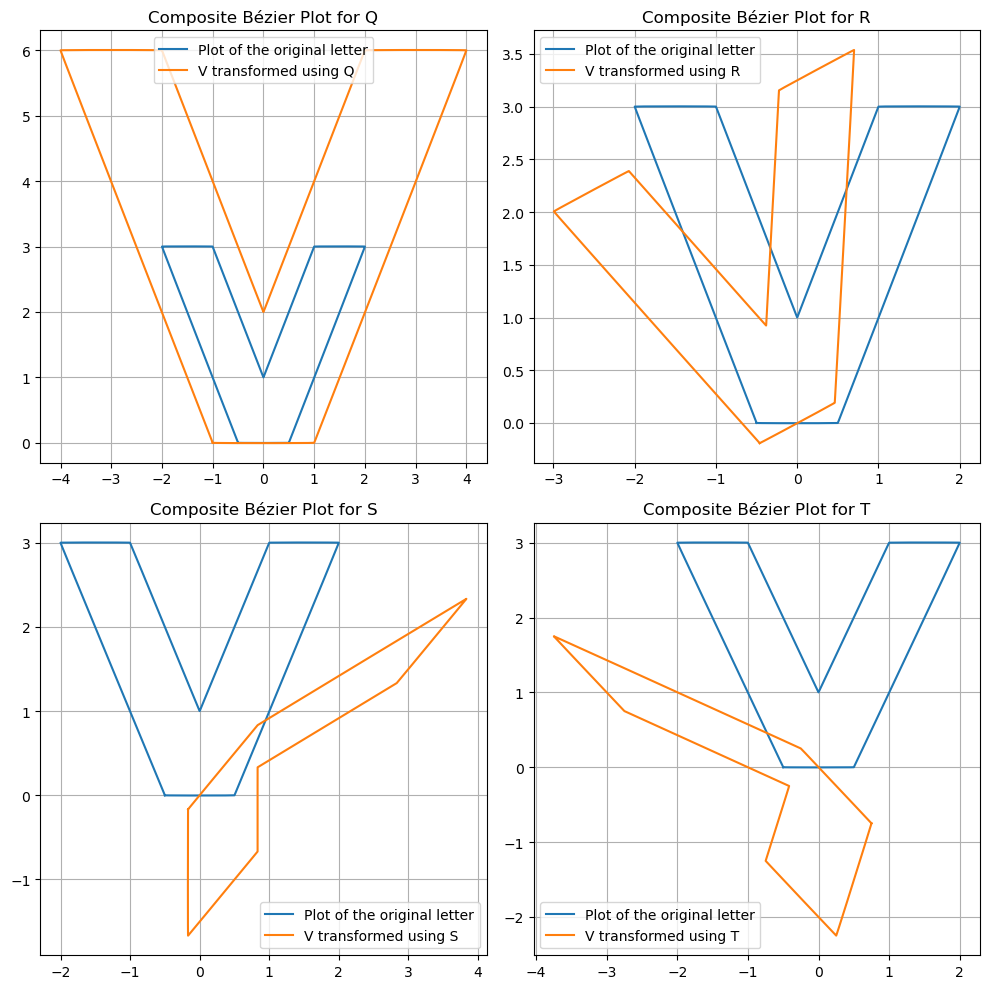

In [13]:
#Calculating the points for "V"
points = interpolate_periodic(v_points,v_velocity)
points = np.array(points)
t = np.linspace(0, len(points), 100 * len(points))

#Calculating for Q
Q = points * 2
x_y_Q = composite_Bezier(Q, t)

#Calculating for R
A_R = np.array([
    [np.cos(np.pi/8), -np.sin(np.pi/8)],
    [np.sin(np.pi/8), np.cos(np.pi/8)]]) #R matrix
R = np.array([[np.dot(A_R, p) for p in segment] for segment in points]) #Multiplying the matrix with the points
x_y_R = composite_Bezier(R, t)

A_S = np.array([
    [1, 1/2],
    [1, 0]]) #S matrix
#Multiplying the matrix with the points
S = np.array([[np.dot(A_S, p) + 1/3 * np.array([1,1]) for p in segment] for segment in points])
x_y_S = composite_Bezier(S, t)

A_T = np.array([
    [-1, -2/3],
    [1, 0]]) #T matrix
#Multiplying the matrix with the points
T = np.array([[np.dot(A_T, p) + 1/4 * np.array([1,-1]) for p in segment] for segment in points])
x_y_T = composite_Bezier(T, t)

#Plotting
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#Plot for Q
ax[0][0].plot(composite_Bezier(points, t)[:,0],composite_Bezier(points, t)[:,1],
             label=r'Plot of the original letter')
ax[0][0].plot(x_y_Q[:,0], x_y_Q[:,1], label='V transformed using Q')
ax[0][0].grid(True)
ax[0][0].set_title("Composite Bézier Plot for Q")
ax[0][0].legend()

#Plot for R
ax[0][1].plot(composite_Bezier(points, t)[:,0],composite_Bezier(points, t)[:,1],
             label=r'Plot of the original letter')
ax[0][1].plot(x_y_R[:,0], x_y_R[:,1], label='V transformed using R')
ax[0][1].grid(True)
ax[0][1].set_title("Composite Bézier Plot for R")
ax[0][1].legend()

#Plot for S
ax[1][0].plot(composite_Bezier(points, t)[:,0],composite_Bezier(points, t)[:,1],
             label=r'Plot of the original letter')
ax[1][0].plot(x_y_S[:,0], x_y_S[:,1], label='V transformed using S')
ax[1][0].grid(True)
ax[1][0].set_title("Composite Bézier Plot for S")
ax[1][0].legend()

#Plot for T
ax[1][1].plot(composite_Bezier(points, t)[:,0],composite_Bezier(points, t)[:,1],
              label=r'Plot of the original letter')
ax[1][1].plot(x_y_T[:,0], x_y_T[:,1], label='V transformed using T')
ax[1][1].grid(True)
ax[1][1].set_title("Composite Bézier Plot for T")
ax[1][1].legend()

fig.tight_layout()
plt.show()

Looking at the figure above, we can find 4 plots, each of them representing the composite Bézier plot for respectively `Q`, `R`, `S` and `T`. 

Consider the plot for `Q`. We can see that the plot is twice the size of the original one since both the x-axis and y-axis are twice as long as the original plot. This makes sense as the new set of control points, that is $\textbf{q}_{i,j} = 2 \textbf{p}_{i,j}$, is just $\textbf{p}_{i,j}$ multiplied by two, which then reflects on the composite Bézier plot for `Q`.

Looking at the composite Bézier plot for `R`, we can see that its shape is the same as the one of the original figure. However, the plot for `R` seems to have rotated in the anti-clockwise direction. This is due to the matrix that we are multiplying $\textbf{p}_{i,j}$ with to get $\textbf{r}_{i,j}$, that is 

$$
R(\textbf{p}_{i,j}) = \begin{bmatrix}
\text{cos} \frac{\pi}{8} & -\text{sin}\frac{\pi}{8} \\
\text{sin} \frac{\pi}{8} & \text{cos}\frac{\pi}{8} \\
\end{bmatrix} \textbf{p}_{i,j},
$$

which is a rotation matrix that rotates the given set of points $\textbf{p}_{i,j}$ by $\frac{\pi}{8}$ (which is $22.5^{\circ}$), around the point $(0,0)$. This results in the plot for `R` rotating by $22.5^{\circ}$, which can be seen in the respective plot.

Now, consider the plot for `S`. The matrix $S$ is a linear transformation

$$
S(\textbf{p}_{i,j})=\begin{bmatrix}
1 & \frac{1}{2} \\
1 & 0 \\
\end{bmatrix}\textbf{p}_{i,j},
$$

where 
$$
S\left(\begin{bmatrix}1 \\0 \\ \end{bmatrix}\right)=\begin{bmatrix}1 \\1 \\ \end{bmatrix},
$$ 
and 
$$
S \left(\begin{bmatrix}0 \\1 \\ \end{bmatrix}\right)=\begin{bmatrix}\frac{1}{2} \\0 \\ \end{bmatrix}.
$$ 

After the linear transformation, we shift all the points by $\frac{1}{3}\begin{bmatrix}1 \\1 \\ \end{bmatrix}$. In other words, 

$$
\forall \textbf{p}_{i,j} = \begin{bmatrix}x \\y \\ \end{bmatrix}, \; x,y\in \mathbb{R}, 
$$
then, 
$$
S(\textbf{p}_{i,j}) = 
\begin{bmatrix}
x+\frac{1}{2}y\\
x 
\end{bmatrix}.
$$

The result for $S(\textbf{p}_{i,j})$ is then shifted by $\frac{1}{3}$ in the positive direction of the x-axis and $\frac{1}{3}$ upwards, towards the positive y-axis.

Lastly, a similar transformation can also be observed for `T`. The matrix $T$ is a linear transformation
$$
T(\textbf{p}_{i,j})=\begin{bmatrix}
-1 & -\frac{2}{3} \\
1 & 0 \\
\end{bmatrix}\textbf{p}_{i,j},
$$
where 
$$
T\left(\begin{bmatrix}1 \\0 \\ \end{bmatrix}\right)=\begin{bmatrix}-1 \\1 \\ \end{bmatrix},
$$
and 
$$
T\left(\begin{bmatrix}0 \\1 \\ \end{bmatrix} \right)=\begin{bmatrix}-\frac{2}{3} \\0 \\ \end{bmatrix}.
$$
After that we shift the linear transformation of $\textbf{p}_{i,j}$ by $\frac{1}{4}\begin{bmatrix}1 \\-1 \\ \end{bmatrix}$. In other words, 

$$
\forall \textbf{p}_{i,j}=\begin{bmatrix}x \\y \\ \end{bmatrix}, \; x,y\in \mathbb{R}, 
$$
then
$$
S(\textbf{p}_{i,j}) = \begin{bmatrix}-x-\frac{2}{3}y \\x \\ \end{bmatrix}
$$

Thereafter, the linear transformation is then $S(\textbf{p}_{i,j})$ shifted by $\frac{1}{4}$ towards the positive x-axis and $\frac{1}{4}$ in the direction of the negative y-axis.

### Task 4: Optimisation with Bézier curves

Similar to Task 3, we assume that we have a composite cubic Bézier curve $\textbf{B}(t)$ – not necessarily periodic – with $m$ segments, i.e. control points $\textbf{p}_{0,1}, \textbf{p}_{1,1}, \textbf{p}_{2,1}, \textbf{p}_{3,1}, \textbf{p}_{0,2}, \textbf{p}_{1,2},\ldots , \textbf{p}_{3,m}$. We denote its segments by $\textbf{c}_i:[i-1,i]\rightarrow \mathbb{R}^2$, for $i=1,\ldots ,m$. Then $\textbf{B}(t)$ is defined on $[0,m]$. We further assume that $\textbf{B}(t)$ is $C^1$-continuous.

**a)** Since we know that $\textbf{B}(t)$ is $C^1$-continuous, this means that we are storing some redundant data for both control points and velocities at the join points between segments. Because of that, we can express $\textbf{p}_{3,i}$ as 

$$
\begin{equation}
\textbf{p}_{3,i} = \textbf{p}_{0,i+1} \; \text{for} \; i=1,\ldots,m-1.
\end{equation}
$$

Furthermore, due to $C^1$-continuity of $\textbf{B}(t)$, we can express $\textbf{p}_{2,i}$ using $\textbf{p}_{0,i+1}$ and $\textbf{p}_{1,i+1}$ for each $i=1, \ldots, m-1$. Therefore, recall that

$$
\textbf{p}_{1, i+1}=2 \textbf{p}_{0, i+1} - \textbf{p}_{2, i}.
$$

Geometrically, the equation above means that the neighbouring points are mirrored by the join point. Since the velocity at a join point is only dependent on the neighbouring control points, we write that

$$
\textbf{v}_{i+1}=3\left(\textbf{p}_{0, i+1} - \textbf{p}_{2, i}\right)=3\left(\textbf{p}_{1, i+1}-\textbf{p}_{0, i+1}\right),
$$

which results in 

$$
\textbf{p}_{2, i}=\textbf{p}_{0, i+1}-\frac{1}{3} \textbf{v}_{i+1}
$$

and 

$$
\textbf{p}_{1, i+1} = \textbf{p}_{0, i+1} + \frac{1}{3} \textbf{v}_{i+1}.
$$

**b)** We now want to minimise the squared accelaration of the curve 

$$
F(\textbf{P}) := \int_{0}^{m} \lVert \textbf{B}''(t)\rVert^2 \text{d}t,
$$

where $\textbf{P} = [\textbf{p}_{0,1}, \textbf{p}_{1,1}, \textbf{p}_{0,2}, \textbf{p}_{1,2}, \ldots, \textbf{p}_{0,m-1}, \textbf{p}_{1,m-1}, \textbf{p}_{0,m}, \textbf{p}_{1,m}, \textbf{p}_{2,m}, \textbf{p}_{3,m}]$. However, since this is a long and tidious task, we we only consider one segment, that is $\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3} \in \mathbb{R}^2$. This means that we are to solve the following problem:

$$
\tilde{F}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3}) := \int_{0}^{1} \lVert \textbf{b}_3''(t; \textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3})\rVert_2^2 \text{d}t.
$$

Using the result for $\tilde{F}(\textbf{q}$, we will find its gradient, that is, $\nabla \tilde{F}(\textbf{q})$.

We first derive the second derivative of the Bézier curve, that is

$$
\textbf{b}_{3}^{\prime \prime}(t)=n(n-1) \sum_{i=0}^{n-2} \textbf{B}_{i, n-2}(t)\left(\textbf{p}_{i+2} - 2\textbf{p}_{i+1} + \textbf{p}_{i}\right).
$$

To solve the problem, we let $n=1$, resulting in 

$$
\begin{aligned}
\textbf{b}_{3}^{\prime \prime}(t) & =6 \sum_{i=0}^{1} B_{i, 1}(t)\left(\textbf{q}_{i+2}-2 \textbf{q}_{i+1}+\textbf{q}_{i}\right) \\
& =6 B_{0,1}(t)\left(\textbf{q}_{2}-2 \textbf{q}_{1}+\textbf{q}_{0}\right)+6 B_{1,1}(t)\left(\textbf{q}_{3}-2 \textbf{q}_{2}+\textbf{q}_{1}\right).
\end{aligned}
$$

Given that 

$$
\begin{aligned}
B_{0,1} & (t)=1-t \qquad \text{and} \qquad B_{1,1}(t)=t,
\end{aligned}
$$

we get

$$
\textbf{b}_{3}^{\prime \prime}(t) = 6(1-t)\left(\textbf{q}_{2}-2 \textbf{q}_{1}+\textbf{q}_{0}\right)+6 t\left(\textbf{q}_{3}-2 \textbf{q}_{2}+\textbf{q}_{1}\right)
$$

Now consider the Euclidean norm $\Vert \cdot \Vert_2$. Taking the Euclidean norm on $\textbf{b}_{3}^{\prime \prime}(t)$, that is, 

$$
\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2 = \sqrt{\textbf{b}_{3}^{\prime \prime}(t)\cdot \textbf{b}_{3}^{\prime \prime}(t)}, 
$$

and squaring on both sides, we get

$$
\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2 = \bigg(6(1-t)\left(\textbf{q}_{2}-2 \textbf{q}_{1}+\textbf{q}_{0}\right)+6 t\left(\textbf{q}_{3}-2 \textbf{q}_{2}+\textbf{q}_{1}\right)\bigg)^2.
$$

Let us now integrate $\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2$ over one segment. This results in 

$$
\tilde{F}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3}) = \int_{0}^{1}\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2 \; \text{d}t = 12\left(\textbf{q}_{0}^{2} + \textbf{q}_{0}\left(\textbf{q}_{3}-3 \textbf{q}_{1}\right)+3 \textbf{q}_{1}^{2}-3 \textbf{q}_{1} \textbf{q}_{2}+3 \textbf{q}_{2}^{2}-3 \textbf{q}_{2} q_{3}+\textbf{q}_{3}^{2}\right). 
$$

We can compute the gradient of $\tilde{F}$ by calculating the partial derivative of each point:

$$
\begin{aligned}
& \frac{\partial \tilde{F}}{\partial \textbf{q}_{0}}=12\left(2 \textbf{q}_{0}+\textbf{q}_{3}-3 \textbf{q}_{1}\right) \\
& \frac{\partial \tilde{F}}{\partial \textbf{q}_{1}}=12\left(-3 \textbf{q}_{0}+6 \textbf{q}_{1}-3 \textbf{q}_{2}\right) \\
& \frac{\partial \tilde{F}}{\partial \textbf{q}_{2}}=12\left(-3 \textbf{q}_{1}+6 \textbf{q}_{2}-3 \textbf{q}_{3}\right) \\
& \frac{\partial \tilde{F}}{\partial \textbf{q}_{3}}=12\left(\textbf{q}_{0}+2 \textbf{q}_{3}-3 \textbf{q}_{2}\right),
\end{aligned}
$$

resulting in 

$$
\nabla \tilde{F}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3})= 
12\left[\begin{array}{c}
2 \textbf{q}_{0}+\textbf{q}_{3}-3 \textbf{q}_{1} \\
-3 \textbf{q}_{0}+6 \textbf{q}_{1}-3 \textbf{q}_{2} \\
-3 \textbf{q}_{1}+6 \textbf{q}_{2}-3 \textbf{q}_{3} \\
\textbf{q}_{0}+2 \textbf{q}_{3}-3 \textbf{q}_{2}.
\end{array}\right]
$$

Note that this is the gradient for one segment. If we were to minimize the acceleration of a composite Bézier curve, the gradient at one segment is dependent on the next segment. Thus, we can look at the square of the acceleration of two segments. By doing so, we can get the gradient with respect to all the points of a composite Bézier curve. Mathematically, this results in 

$$
\int_{0}^{2}\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2 \text{d}t = \int_{0}^{1}\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2 \text{d}t + \int_{1}^{2}\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2 \text{d}t.
$$

Let the points $\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}$ and $ \textbf{q}_{3}$ be the control points for the first segment and $\textbf{p}_{0}, \textbf{p}_{1}, \textbf{p}_{2}$ and $\textbf{p}_{3}$ for the second segment. Using the properties from $C^0$- and $C^{1}$-continuity, we get that 

$$
\textbf{q}_{3} = \textbf{p}_{0} \qquad \text {and} \qquad \textbf{q}_{2} = 2\textbf{p}_{0} - \textbf{p}_{1}.
$$

Hence, the expression for the squared acceleration can be written as

$$
\begin{aligned}
& \int_{0}^{2}\Vert\textbf{b}_{3}^{\prime \prime}(t)\Vert_2^2 \text{d}t = 12\left(\textbf{q}_{0}^{2} + \textbf{q}_{0} \left(\textbf{p}_{0} - 3\textbf{q}_{1} \right) + 3\textbf{q}_{1}^{2} - 3\textbf{q}_{1} \left(2\textbf{p}_{0} - \textbf{p}_{1}\right) + 3\left(2 \textbf{p}_{0} - \textbf{p}_{1}\right)^{2}\right. \\
& - 3\left(2 \textbf{p}_{0} - \textbf{p}_{1}\right) \textbf{p}_{0} + \textbf{p}_{0}^{2} + \textbf{p}_{0}^{2} + \textbf{p}_{0}\left(\textbf{p}_{3} - 3\textbf{p}_{1}\right) + 3\textbf{p}_{1}^{2} - 3\textbf{p}_{1} \textbf{p}_{2} + 3 \textbf{p}_{2}^{2} - 3\textbf{p}_{2} \textbf{p}_{3} +\textbf{p}_{3}^{2} \bigg) \\
& = 12 \bigg( \textbf{q}_0^2 + \textbf{q}_0(\textbf{p}_0 -3\textbf{q}_1) +\textbf{q}_1^2 - 3\textbf{q}_1(2\textbf{p}_0 - \textbf{p}_1) + 3(2\textbf{p}_0 - \textbf{p}_1)^2 - 4\textbf{p}_0^2 - 6\textbf{p}_0\textbf{p}_1 + \textbf{p}_0\textbf{p}_3 + 3\textbf{p}_1^2 - 3\textbf{p}_1\textbf{p}_2 + 3\textbf{p}_2^2 - 3\textbf{p}_2\textbf{p}_3 + \textbf{p}_3^2\bigg) 
\end{aligned}
$$

Taking the partial derivative of the expression above with respect to $\textbf{q}_{0}, \textbf{q}_{1}, \textbf{p}_{2}$ and $\textbf{p}_{3}$, we can find the gradient at the edges of the composite Bézier curve, whereas the partial derivative with respect to $\textbf{p}_{0}$ and $\textbf{p}_{1}$ will lead to the gradient of the middle points. Note that the gradient at $\textbf{q}_{2}$ and $\textbf{q}_{3}$ is not needed. This is due to fact that those control points can be found using the $C^{1}$ and $C^{0}$-continuity properties that we have previously mentioned.

**c)** We want now to take look at the first order optimality conditions of the optimisation task to minimise $\tilde{F}$ from the previous item.  To do so, that is, minimising $\tilde{F}$, we need to look at the points where $\nabla \tilde{F}=0$. Mathematically, we can express the problem as

$$
\nabla \tilde{F}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3})=12\left[\begin{array}{c}
2 \textbf{q}_{0}+\textbf{q}_{3}-3 \textbf{q}_{1} \\
-3 \textbf{q}_{0}+6 \textbf{q}_{1}-3 \textbf{q}_{2} \\
-3 \textbf{q}_{1}+6 \textbf{q}_{2}-3 \textbf{q}_{3} \\
\textbf{q}_{0}+2 \textbf{q}_{3}-3 \textbf{q}_{2}
\end{array}\right] = \textbf{0},
$$

which also can be written as a system of equations, that is,

$$
\begin{aligned}
& 2 \textbf{q}_{0}+\textbf{q}_{3}-3 \textbf{q}_{1} = 0\\
& -3 \textbf{q}_{0}+6 \textbf{q}_{1}-3 \textbf{q}_{2} = 0 \\
& -3 \textbf{q}_{1}+6 \textbf{q}_{2}-3 \textbf{q}_{3} = 0\\
& \textbf{q}_{0}+2 \textbf{q}_{3}-3 \textbf{q}_{2} = 0,
\end{aligned}
$$

which results in

$$
\textbf{q}_{1}=\frac{2}{3} \textbf{q}_{0} + \frac{1}{3}\textbf{q}_{3} \; \text{ and } \; \textbf{q}_{2}=\frac{1}{3} \textbf{q}_{0} + \frac{2}{3} \textbf{q}_{3}
$$

As we can see, the system of equations above has two degrees of freedom. This means that the solution is not unique. However, if the first and last points are fixed, we have a unique solution where all points form a line evenly spaced resulting in zero acceleration.

For the overall problem $F$, the solution is still not unique as all lines with evenly spaced points result in a composite Bézier-curve with zero acceleration. No matter how many long segments the curve consists of, it has two degrees of freedom where two points decide where the other points will be located.

**d)** In this item, we extend the problem to have some data points $\textbf{d}_i \in \mathbb{R}^2$, where $i=0, \ldots, m$, given, and we extend the problem to 

$$
G_{\lambda}(\textbf{P}) = \frac{\lambda}{2} \sum_{i=0}^{m}\Vert \textbf{d}_i - \textbf{B}(i)\Vert_2^2 + 
\int_{0}^{m}\Vert\textbf{B}''(t)\Vert_2^2,
$$

for some $\lambda > 0$. Since solving the problem above is a tidious process, we first look at a more simplified problem: Given two points $\textbf{s}, \textbf{e} \in \mathbb{R}^2$, we consider for some $\lambda > 0$ the function for one segment, that is

$$
\begin{align*}
\tilde{G}_{\lambda}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3}) &= \frac{\lambda}{2}(\Vert \textbf{s} - \textbf{b}_3(0;\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3})\Vert_2^2 + \Vert \textbf{e} - \textbf{b}_3(1;\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3})\Vert_2^2) + 
\tilde{F}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3}) = \\
& = \frac{\lambda}{2}(\Vert \textbf{s} - \textbf{q}_0 \Vert_2^2 - \Vert \textbf{e} - \textbf{q}_3 \Vert_2^2) + \tilde{F}(\textbf{q}_{0}, \textbf{q}_{1}, \textbf{q}_{2}, \textbf{q}_{3}).
\end{align*}
$$

Now let us check on the uniqueness of $\tilde{G}_{\lambda}$. To do so, consider the gradient of $\tilde{G}$, that is, 

$$
\nabla \tilde{G}=\left[\begin{array}{l}
12\left(2 \textbf{q}_{0} - 3\textbf{q}_{1} + \textbf{q}_{3}\right) - \lambda\left(\textbf{s} - \textbf{q}_{0}\right) \\
12\left(-3 \textbf{q}_{0} + 6\textbf{q}_{1} - 3\textbf{q}_{2}\right) \\
12\left(-3\textbf{q}_{1} + 6\textbf{q}_{2} - 3\textbf{q}_{3}\right) \\
12\left(\textbf{q}_{0} + 2\textbf{q}_{3} - 3\textbf{q}_{2}\right) - \lambda\left(\textbf{e} - \textbf{q}_{3}\right)
\end{array}\right]
$$

We then find all points where $\nabla \tilde{G}=0$. Since a norm is always positive, the only way that $ \tilde{G}$ is zero is when $\textbf{q}_{0} = \textbf{s}$ and $\textbf{q}_{3} = \textbf{e}$. This results in one unique solution which can be expressed as 

$$
\begin{aligned}
& \textbf{q}_{0} = \textbf{s} \\
& \textbf{q}_{1} = \frac{2}{3} \textbf{s} + \frac{1}{3}\textbf{e} \\
& \textbf{q}_{2} = \frac{1}{3} \textbf{s} + \frac{2}{3}\textbf{e} \\
& \textbf{q}_{3} = \textbf{e}
\end{aligned}
$$

If we consider multiple segments, we can conlude that not all join will necessarily be connected by the composite Bézier curve formed by the minimized points. In the expression for $G_{\lambda}$, it is the value for $\lambda$ that will decide how much the join points will "pull" on the curve. If $\lambda$ approaches infinity, then all of the join points will be connected. Conversely, if $\lambda$ approaches zero, the minimized curve will then form a straight line, no matter where the join points are. 

**e)** Using the knowledge we have gained through the previous parts, we will now derive a gradient descent algorithm to minimise $G_{\lambda}(\textbf{P})$ with respect to the control points $\textbf{P}$.

To do so, we will first write a code for the gradient of $G_{\lambda}$ which one can find below.

In [14]:
'''''
The function 'make_gradient' is the gradient for G_λ(P). It takes in: 
    - point_list: a list with points which the gradient has to be calculated at
    - Lambda: scalar value for lambda of choice
    - join_points: a list with the join-points between segments of the Bézier curve
    
Returns:
    - gradient: the value of the gradient
'''''

def make_gradient(point_list, join_points, Lambda):
    
    gradient = []
        
    for i in range(len(point_list)):
        q0, q1, q2, q3 = point_list[i-1]
        p0, p1, p2, p3 = point_list[i]
        
        gradient.append(12*(16*p0-12*p1+p3+q0-6*q1) -2*Lambda*(join_points[i]-p0))
        gradient.append(12*(3*q1-12*p0+12*p1-3*p2))
        
    return np.array(gradient)

Next, one can find a code block which is an implementation of the gradient descent algorithm to minimise $G_{\lambda}(\textbf{P})$. Note that we are using a constant step size. 

In [15]:
'''''
The function 'gradient_descent_bezier' is an implementation of the gradient descent algorithm, which solves
the problem for minimization of G_λ(P) with respect to P. It takes in:
    - points: control points
    - lamda: scalar value for lambda of choice
    - learning_rate: step size
    - iterations: number of iterations, default = 1000
    - tolerance: tolerance for the break condition of the for-loop inside the function, default = 1e-6
    
Returns:
    - point_list: points for the resulting composite Bézier curve.
'''''

def gradient_descent_bezier(points, lamda, learning_rate = 0.01, iterations = 1000, tolerance = 1e-6):
    join_points = []
    point_list = np.copy(points)
    
    #Making a copy of the given points
    for i in np.copy(point_list):
        join_points.append(i[0])
    
    for i in range(iterations):
        grad = make_gradient(point_list, join_points, lamda) #calculating the gradient with given data
        
        #Break condition
        if np.linalg.norm(grad) < tolerance:
            break
        
        grad_idx = 0
        
        #Calculating the points
        for j in range(len(point_list)):
            point_list[j][0] -= learning_rate * grad[grad_idx]
            point_list[j][1] -= learning_rate * grad[grad_idx+1]
            grad_idx += 2
        
        for k in range(len(point_list)-1):
            point_list[k][2] = np.copy(2 * point_list[k+1][0] - point_list[k+1][1])
            point_list[k][3] = np.copy(point_list[k+1][0])
        
        point_list[-1][-1] = np.copy(point_list[0][0])
        point_list[-1][-2] = np.copy(2 * point_list[0][0] - point_list[0][1])

    return point_list

We will now use the function above to draw the letter "ß". Note that we are using the same set of control points and velocities as before. 

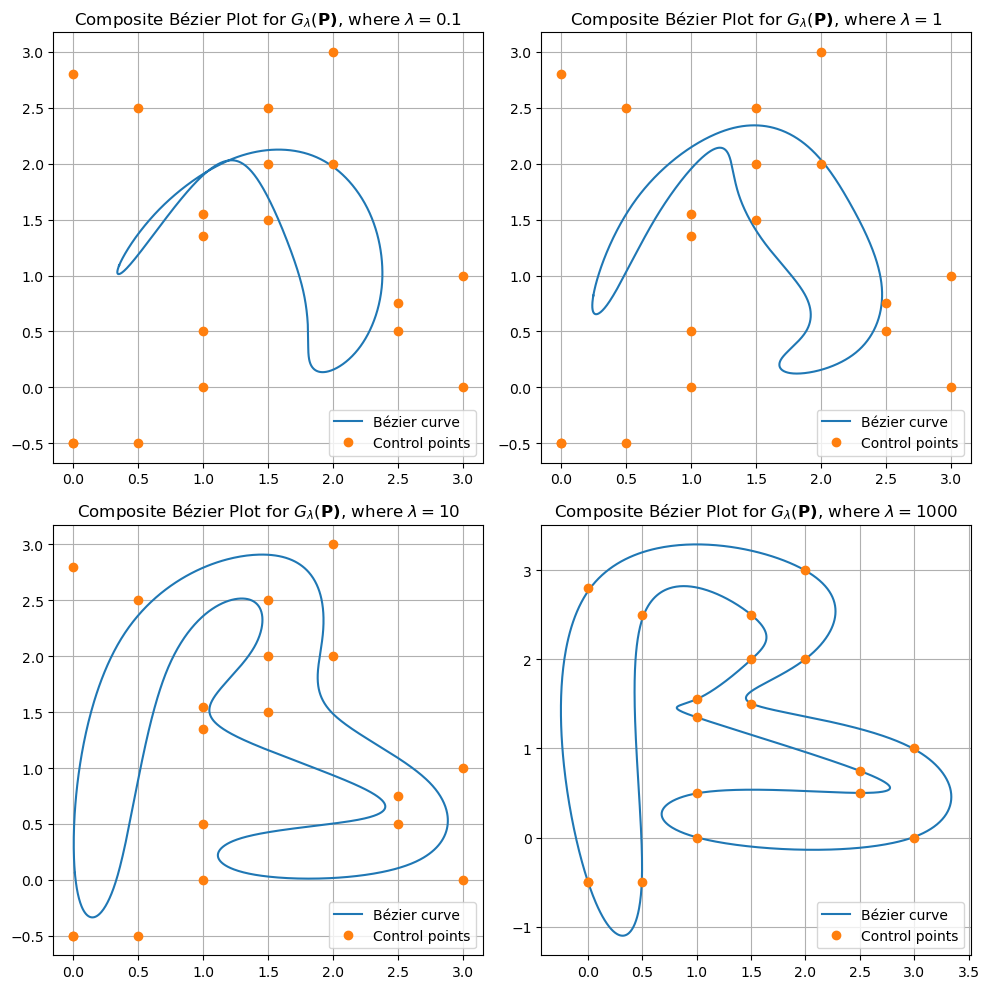

In [16]:
#Taking the letter ß from task 3 as an example:
sz_point_list = interpolate_periodic(sz_points, sz_velocities)

#Applying our function that minimises G_lambda(P) with respect to P
SZs = []
SZs.append(gradient_descent_bezier(sz_point_list, 0.1, 0.0001,10000))
SZs.append(gradient_descent_bezier(sz_point_list, 1, 0.0001,10000))
SZs.append(gradient_descent_bezier(sz_point_list, 10, 0.0001,10000))
SZs.append(gradient_descent_bezier(sz_point_list, 1000, 0.0001,10000))

t = np.linspace(0, len(SZs[0]), 100 * len(SZs[0]))

#Plotting
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

#Plot for lambda = 0.1
ax[0][0].plot(composite_Bezier(SZs[0], t)[:,0], composite_Bezier(SZs[0], t)[:,1], label='Bézier curve')
ax[0][0].plot(sz_points[:,0], sz_points[:,1], "o", label='Control points')
ax[0][0].grid(True)
ax[0][0].set_title(r"Composite Bézier Plot for $G_{\lambda}(\bf{P})$, where $\lambda=0.1$")
ax[0][0].legend(loc=4)

#Plot for lambda = 1
ax[0][1].plot(composite_Bezier(SZs[1], t)[:,0], composite_Bezier(SZs[1], t)[:,1], label='Bézier curve')
ax[0][1].plot(sz_points[:,0], sz_points[:,1], "o", label='Control points')
ax[0][1].grid(True)
ax[0][1].set_title(r"Composite Bézier Plot for $G_{\lambda}(\bf{P})$, where $\lambda=1$")
ax[0][1].legend(loc=4)

#Plot for lambda = 10
ax[1][0].plot(composite_Bezier(SZs[2], t)[:,0], composite_Bezier(SZs[2], t)[:,1], label='Bézier curve')
ax[1][0].plot(sz_points[:,0], sz_points[:,1],"o", label='Control points')
ax[1][0].grid(True)
ax[1][0].set_title(r"Composite Bézier Plot for $G_{\lambda}(\bf{P})$, where $\lambda=10$")
ax[1][0].legend(loc=4)

#Plot for lambda = 100
ax[1][1].plot(composite_Bezier(SZs[3], t)[:,0], composite_Bezier(SZs[3], t)[:,1], label='Bézier curve')
ax[1][1].plot(sz_points[:,0], sz_points[:,1], "o", label='Control points')
ax[1][1].grid(True)
ax[1][1].set_title(r"Composite Bézier Plot for $G_{\lambda}(\bf{P})$, where $\lambda=1000$")
ax[1][1].legend(loc=4)

fig.tight_layout()
plt.show()

In the figure above, one can find 4 different plots, where all of them have different values for $\lambda$. Note that, as previously mentioned, we are keeping the step size constant at $0.0001$. The iteration number is set at $10000$, but can vary due to the break condition inside the `gradient_descent_bezier`-function. 

As we can see, the resulting composite Bézier curve can be seen to get closer to the control points the higher the value for $\lambda$. This was expected as higher values for $\lambda$ minimise the acceleration of the curve so that it gets "pulled" closer to the control points. 

### Conclusion

To conlude, we have, in this project, investigated different properties of the Bézier curve. We started by understanding the properties of Bernstein polynomials and composite Bézier curves, in the process of which we have implemented de Casteljau's algorithm. Thereafter, we did some interpolation with composite, cubic Bézier curves where we have also drawn the letters "V" and "ß" using those composite, cubic Bézier curves. Lastly, we have optimised the Bézier curves by minimising its acceleration, further deepening our understanding of the properties Bézier curve. 

